In [9]:
import os
import csv
import boto3

# Initialize AWS Rekognition client
rekognition = boto3.client('rekognition', region_name='us-west-2')

def analyze_emotion(image_path):
    with open(image_path, 'rb') as image_file:
        image_bytes = image_file.read()

    # Call Rekognition service to detect facial emotions
    response = rekognition.detect_faces(Image={'Bytes': image_bytes}, Attributes=['ALL'])

    # If faces are detected, find the one with the largest area
    if 'FaceDetails' in response and len(response['FaceDetails']) > 0:
        largest_face = max(response['FaceDetails'], key=lambda face: face['BoundingBox']['Width'] * face['BoundingBox']['Height'])
        
        # Get emotion data
        emotions = largest_face['Emotions']
        
        # Create a dictionary to store emotions and their corresponding confidence levels
        emotion_confidences = {emotion['Type']: emotion['Confidence'] for emotion in emotions}
        
        return emotion_confidences
    else:
        return None

def process_images_in_folder(folder_path, output_csv):
    results = []

    # Iterate over all images in the folder
    for image_name in os.listdir(folder_path):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, image_name)
            try:
                emotion_confidences = analyze_emotion(image_path)
                if emotion_confidences is not None:
                    # Append results to the list
                    result = {'Image Name': image_name}
                    result.update(emotion_confidences)
                    results.append(result)
                    print(f"Processed {image_name}: {emotion_confidences}")
                else:
                    print(f"No face detected in {image_name} or unable to analyze emotion.")
            except Exception as e:
                print(f"Error processing {image_name}: {str(e)}")

    # Write results to a CSV file
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ['Image Name', 'HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'UNKNOWN', 'FEAR']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for result in results:
            writer.writerow(result)

    print(f"Analysis complete, results saved to {output_csv}.")

# Replace 'your_image_folder' with your image folder path
# Replace 'output_results.csv' with the path where you want to save the output file
folder_path = 'AIGCimages'
output_csv = 'AIGC_emotion.csv'

process_images_in_folder(folder_path, output_csv)


Processed 8b54bb87-8ef7-5891-a49d-5fff21d33a20.png: {'CALM': 97.76786041259766, 'HAPPY': 0.4468282163143158, 'SURPRISED': 0.08273124694824219, 'ANGRY': 0.07681846618652344, 'CONFUSED': 0.06838639080524445, 'SAD': 0.005310773849487305, 'DISGUSTED': 0.003701448440551758, 'FEAR': 0.00020563602447509766}
Processed 5e4c64df-3907-5a3a-a5dd-7fe6c2839913.png: {'CALM': 96.16350555419922, 'ANGRY': 0.93536376953125, 'CONFUSED': 0.6170272827148438, 'SURPRISED': 0.6093978881835938, 'SAD': 0.23555755615234375, 'HAPPY': 0.054836273193359375, 'DISGUSTED': 0.04940032958984375, 'FEAR': 0.03247261047363281}
Processed cd95a10b-1154-50f0-8515-78de2c14395c.png: {'CONFUSED': 87.72705078125, 'ANGRY': 11.529541015625, 'CALM': 1.776123046875, 'SAD': 0.433349609375, 'DISGUSTED': 0.03516674041748047, 'SURPRISED': 0.007234513759613037, 'FEAR': 0.0034332275390625, 'HAPPY': 0.0006159147014841437}
Processed 08a573c8-2351-5043-a727-e30ea4cfec25.png: {'ANGRY': 39.5263671875, 'CALM': 39.23270034790039, 'SAD': 7.84301757

Processed 04c52a41-d68f-56f7-9a62-e1fe314b3b1d.png: {'CALM': 87.33642578125, 'SAD': 8.648681640625, 'ANGRY': 0.42724609375, 'CONFUSED': 0.01640121266245842, 'FEAR': 0.015354156494140625, 'SURPRISED': 0.008568167686462402, 'DISGUSTED': 0.002974271774291992, 'HAPPY': 0.00042319297790527344}
Processed 150beddb-80a6-55cc-bc32-fbabedd8c8e9.png: {'CALM': 98.46540069580078, 'SAD': 0.79498291015625, 'ANGRY': 0.12922286987304688, 'CONFUSED': 0.06457169353961945, 'DISGUSTED': 0.027942657470703125, 'SURPRISED': 0.01730024814605713, 'FEAR': 0.005602836608886719, 'HAPPY': 0.004398822784423828}
Processed 11af55a5-5e8b-5bcc-b23c-b62a0c2ecd92.png: {'CALM': 97.90736389160156, 'ANGRY': 1.33056640625, 'SAD': 0.11138916015625, 'CONFUSED': 0.019530456513166428, 'SURPRISED': 0.012218952178955078, 'HAPPY': 0.002102056983858347, 'DISGUSTED': 0.0017285346984863281, 'FEAR': 0.0007480382919311523}
Processed 4e9e5d5c-4caa-58bb-9605-636a970fb190.png: {'HAPPY': 93.65234375, 'CALM': 1.79595947265625, 'SURPRISED': 0.

Processed 4a04c1e0-6091-5dfd-bf6e-3b3f24e95cbc.png: {'CALM': 95.1171875, 'ANGRY': 1.62353515625, 'CONFUSED': 0.6669362783432007, 'SAD': 0.3566741943359375, 'SURPRISED': 0.3352165222167969, 'HAPPY': 0.08767445385456085, 'DISGUSTED': 0.047898292541503906, 'FEAR': 0.02777576446533203}
Processed 45069db8-1748-5b13-8783-c6f2191c6dc8.png: {'CALM': 94.62890625, 'SURPRISED': 2.452850341796875, 'ANGRY': 0.32596588134765625, 'HAPPY': 0.2965291142463684, 'FEAR': 0.15926361083984375, 'CONFUSED': 0.14209747314453125, 'DISGUSTED': 0.055789947509765625, 'SAD': 0.03910064697265625}
Processed abca2d65-d2cd-5d2d-8193-60a58d72d87c.png: {'CALM': 99.58147430419922, 'SAD': 0.11949539184570312, 'ANGRY': 0.10023117065429688, 'CONFUSED': 0.023484230041503906, 'SURPRISED': 0.011257827281951904, 'DISGUSTED': 0.00782012939453125, 'HAPPY': 0.006016095168888569, 'FEAR': 0.0006824731826782227}
Processed 1a817f85-7020-5dd9-9764-305a51f442a5.png: {'CALM': 98.046875, 'SAD': 0.887298583984375, 'CONFUSED': 0.148455291986

Processed b4498067-9250-5a15-ad14-13a913b0ca61.png: {'CALM': 95.39620208740234, 'ANGRY': 2.10418701171875, 'SAD': 0.7274627685546875, 'CONFUSED': 0.15687942504882812, 'SURPRISED': 0.07796287536621094, 'FEAR': 0.04589557647705078, 'DISGUSTED': 0.03826618194580078, 'HAPPY': 0.014003117568790913}
Processed 4d3d64f8-3f13-519a-92e6-a441e737ffa1.png: {'CALM': 86.54296875, 'SAD': 7.122802734375, 'CONFUSED': 1.10626220703125, 'ANGRY': 0.32291412353515625, 'SURPRISED': 0.2677440643310547, 'FEAR': 0.16078948974609375, 'HAPPY': 0.148773193359375, 'DISGUSTED': 0.03001689910888672}
Processed d86294ce-c2a1-571c-9655-74751a77f9a2.png: {'CALM': 97.14006805419922, 'ANGRY': 1.381683349609375, 'SAD': 0.469970703125, 'CONFUSED': 0.08503596484661102, 'DISGUSTED': 0.019943714141845703, 'SURPRISED': 0.014536082744598389, 'HAPPY': 0.0005304813385009766, 'FEAR': 0.00034868717193603516}
Processed 2f83f857-bf2d-5d5e-be95-7603c36ec264.png: {'CALM': 92.1875, 'SAD': 4.791259765625, 'ANGRY': 0.3688812255859375, 'CON

Processed 00a57d25-effe-5fff-bbfd-f151d543476e.png: {'CALM': 89.89990234375, 'HAPPY': 1.2736003398895264, 'ANGRY': 0.992584228515625, 'SURPRISED': 0.9436607360839844, 'SAD': 0.64849853515625, 'CONFUSED': 0.6173452138900757, 'FEAR': 0.03829002380371094, 'DISGUSTED': 0.03409385681152344}
Processed 6cffe7ad-050d-5e35-ab2a-e406672aed63.png: {'HAPPY': 57.6484375, 'CALM': 9.771728515625, 'SURPRISED': 0.2923011779785156, 'CONFUSED': 0.13820329308509827, 'SAD': 0.13751983642578125, 'ANGRY': 0.012058019638061523, 'DISGUSTED': 0.006067752838134766, 'FEAR': 0.0054895877838134766}
Processed b571a142-bda0-534a-8092-eae81ca160e5.png: {'CALM': 69.55078125, 'HAPPY': 4.4921875, 'CONFUSED': 1.5843709707260132, 'SAD': 1.24969482421875, 'SURPRISED': 0.4780292510986328, 'ANGRY': 0.05984306335449219, 'FEAR': 0.015521049499511719, 'DISGUSTED': 0.0033974647521972656}
Processed 5a250cd2-63c5-5297-84c3-7bfd56244691.png: {'CALM': 99.30245208740234, 'ANGRY': 0.203704833984375, 'SAD': 0.06508827209472656, 'HAPPY':

Processed 02cc717e-114d-5d09-9901-4f4345f68d15.png: {'CALM': 97.14006805419922, 'ANGRY': 0.8026123046875, 'CONFUSED': 0.47079721093177795, 'SURPRISED': 0.2732276916503906, 'SAD': 0.2689361572265625, 'HAPPY': 0.020964939147233963, 'DISGUSTED': 0.017178058624267578, 'FEAR': 0.014269351959228516}
Processed 52cf4116-f11e-5076-a042-08ebaf12625e.png: {'CALM': 91.97823333740234, 'ANGRY': 2.386474609375, 'SAD': 2.020263671875, 'CONFUSED': 0.568389892578125, 'SURPRISED': 0.2460479736328125, 'FEAR': 0.13256072998046875, 'DISGUSTED': 0.08149147033691406, 'HAPPY': 0.0023543834686279297}
Processed 5e6c36e8-e074-56d1-a7bf-548f3924448d.png: {'CALM': 97.90736389160156, 'SAD': 1.13372802734375, 'CONFUSED': 0.1926422119140625, 'ANGRY': 0.05536079406738281, 'SURPRISED': 0.03454089164733887, 'DISGUSTED': 0.03204345703125, 'HAPPY': 0.0018278757343068719, 'FEAR': 0.001296401023864746}
Processed b8697d0f-a694-5c46-ad56-e5c5d40018b3.png: {'CALM': 99.16294860839844, 'SURPRISED': 0.24843215942382812, 'SAD': 0.0

Processed e300e6a2-7b60-525e-8ad2-5ccae4bad7cd.png: {'CALM': 94.34989166259766, 'ANGRY': 2.5054931640625, 'CONFUSED': 0.8589426875114441, 'SAD': 0.3292083740234375, 'SURPRISED': 0.023484230041503906, 'DISGUSTED': 0.009453296661376953, 'HAPPY': 0.008980432525277138, 'FEAR': 0.008296966552734375}
Processed 2b373b1c-168b-50f6-bdfc-4fbaa5b95405.png: {'CALM': 97.90736389160156, 'CONFUSED': 0.8983612060546875, 'SAD': 0.2155303955078125, 'SURPRISED': 0.09566545486450195, 'FEAR': 0.01666545867919922, 'HAPPY': 0.010522207245230675, 'ANGRY': 0.00985264778137207, 'DISGUSTED': 0.008231401443481445}
Processed f6423c14-b7f2-5ad8-bbd0-0438487ce35f.png: {'CALM': 98.74442291259766, 'CONFUSED': 0.46507516503334045, 'SAD': 0.10166168212890625, 'SURPRISED': 0.08767843246459961, 'HAPPY': 0.0466664656996727, 'ANGRY': 0.022673606872558594, 'FEAR': 0.006413459777832031, 'DISGUSTED': 0.002562999725341797}
Processed 1eb04e31-808a-5f52-beef-2cab693cb33a.png: {'CALM': 99.16294860839844, 'ANGRY': 0.174713134765625

Processed 693585e1-3125-5e1b-acf2-2bb5c3112051.png: {'CALM': 73.9453125, 'HAPPY': 5.1676435470581055, 'CONFUSED': 0.2943674921989441, 'SURPRISED': 0.2617835998535156, 'ANGRY': 0.09660720825195312, 'DISGUSTED': 0.054645538330078125, 'SAD': 0.003713369369506836, 'FEAR': 0.000286102294921875}
Processed 02b29fbb-4a5d-5303-965b-688bf89762a2.png: {'CALM': 95.39620208740234, 'ANGRY': 1.666259765625, 'CONFUSED': 0.6815592050552368, 'SURPRISED': 0.30684471130371094, 'SAD': 0.29735565185546875, 'HAPPY': 0.06605784595012665, 'DISGUSTED': 0.008273124694824219, 'FEAR': 0.0037103891372680664}
Processed bd02111e-f938-526a-94c4-b17ec329bcec.png: {'CALM': 99.0234375, 'ANGRY': 0.37250518798828125, 'SAD': 0.15411376953125, 'CONFUSED': 0.036776065826416016, 'HAPPY': 0.0336964949965477, 'SURPRISED': 0.019371509552001953, 'DISGUSTED': 0.01500844955444336, 'FEAR': 0.00864267349243164}
Processed 46c63d33-ee53-59d0-b793-00266726f781.png: {'CONFUSED': 74.58984375, 'CALM': 11.617838859558105, 'SAD': 4.7424316406

Processed 1cf2d861-1f66-5747-be2c-7feb41fb4ba3.png: {'CALM': 94.34989166259766, 'CONFUSED': 1.1870067119598389, 'SAD': 0.830841064453125, 'ANGRY': 0.787353515625, 'HAPPY': 0.2483367919921875, 'SURPRISED': 0.1735687255859375, 'DISGUSTED': 0.021636486053466797, 'FEAR': 0.013995170593261719}
Processed 49374105-23c2-5eb2-89e1-5b6692a63143.png: {'CALM': 90.234375, 'SAD': 3.10821533203125, 'CONFUSED': 2.8508505821228027, 'DISGUSTED': 0.09551048278808594, 'SURPRISED': 0.09518861770629883, 'FEAR': 0.047016143798828125, 'ANGRY': 0.01780986785888672, 'HAPPY': 0.0017821788787841797}
Processed 3b34b8ef-d556-5e52-8429-a3a50bd5be5e.png: {'CALM': 80.74462890625, 'SAD': 12.92724609375, 'SURPRISED': 0.5702972412109375, 'ANGRY': 0.37975311279296875, 'CONFUSED': 0.3573099970817566, 'DISGUSTED': 0.06999969482421875, 'FEAR': 0.06880760192871094, 'HAPPY': 0.006477037910372019}
Processed ce4e1530-bfb5-57f6-bc79-d0ff47453806.png: {'CONFUSED': 87.72705078125, 'CALM': 9.210205078125, 'SAD': 2.0751953125, 'ANGRY

Processed 0be026d0-7c23-5b17-aa86-d564d6f25239.png: {'SURPRISED': 87.54296875, 'HAPPY': 10.252511978149414, 'FEAR': 0.013077259063720703, 'CONFUSED': 0.005443890579044819, 'CALM': 0.0014841556549072266, 'ANGRY': 0.0010311603546142578, 'DISGUSTED': 2.9802322387695312e-05, 'SAD': 0.0}
Processed 0eae70b9-851a-5624-8048-6f7c41c7e8a6.png: {'CALM': 99.44196319580078, 'HAPPY': 0.09733836352825165, 'ANGRY': 0.04444122314453125, 'SAD': 0.03459453582763672, 'SURPRISED': 0.017017126083374023, 'CONFUSED': 0.009546676650643349, 'DISGUSTED': 0.0016391277313232422, 'FEAR': 0.001189112663269043}
Processed 4a7f017c-2e9a-5da4-bf88-d252b54402a2.png: {'CALM': 94.21038055419922, 'SAD': 3.8848876953125, 'ANGRY': 0.05145072937011719, 'CONFUSED': 0.046372413635253906, 'SURPRISED': 0.029221177101135254, 'DISGUSTED': 0.017917156219482422, 'HAPPY': 0.0072042145766317844, 'FEAR': 0.005739927291870117}
Processed cf9ddd72-ec63-5d88-8a8d-296acd2f9d21.png: {'CALM': 98.60491180419922, 'SURPRISED': 0.5822181701660156, 

Processed 31dfeef8-9be7-5ad8-97b3-491e3f7d2af6.png: {'CALM': 78.095703125, 'SAD': 14.02587890625, 'CONFUSED': 0.6246566772460938, 'SURPRISED': 0.21147727966308594, 'DISGUSTED': 0.13704299926757812, 'ANGRY': 0.08149147033691406, 'FEAR': 0.07796287536621094, 'HAPPY': 0.009242692962288857}
Processed 1b67fef7-6984-533f-ad05-5409590bba4d.png: {'CALM': 50.875003814697266, 'ANGRY': 27.0263671875, 'SAD': 0.707244873046875, 'CONFUSED': 0.19979476928710938, 'SURPRISED': 0.1093745231628418, 'FEAR': 0.033283233642578125, 'DISGUSTED': 0.03294944763183594, 'HAPPY': 0.004613399505615234}
Processed 0f74e59d-c0e4-57be-b933-b0797c85fb25.png: {'CALM': 92.60602569580078, 'SURPRISED': 1.53350830078125, 'HAPPY': 0.95062255859375, 'CONFUSED': 0.637054443359375, 'ANGRY': 0.15115737915039062, 'SAD': 0.1323699951171875, 'DISGUSTED': 0.04737377166748047, 'FEAR': 0.020587444305419922}
Processed 003ae04e-cecc-5802-8e93-758d9be3d839.png: {'CALM': 98.74442291259766, 'SAD': 0.64239501953125, 'CONFUSED': 0.19772846996

Processed 2d57c5f9-fd2d-5893-8d62-5512a050a8dc.png: {'CALM': 92.95479583740234, 'HAPPY': 1.5899658203125, 'SURPRISED': 0.05778670310974121, 'SAD': 0.025224685668945312, 'CONFUSED': 0.025153160095214844, 'ANGRY': 0.0023603439331054688, 'DISGUSTED': 0.001627206802368164, 'FEAR': 0.0005871057510375977}
Processed 4c56303a-46c1-5a18-83de-8ad62adbc725.png: {'CALM': 99.0234375, 'ANGRY': 0.40283203125, 'SURPRISED': 0.15842914581298828, 'CONFUSED': 0.07847945392131805, 'HAPPY': 0.024366378784179688, 'DISGUSTED': 0.004476308822631836, 'SAD': 0.0035703182220458984, 'FEAR': 0.002256035804748535}
Processed 4c2f5383-f7e2-57c3-b5ff-47b5bf6f0293.png: {'CALM': 99.44196319580078, 'SURPRISED': 0.14865398406982422, 'HAPPY': 0.06237030029296875, 'SAD': 0.04978179931640625, 'CONFUSED': 0.03864368051290512, 'ANGRY': 0.017750263214111328, 'DISGUSTED': 0.0018715858459472656, 'FEAR': 0.0003606081008911133}
Processed 1f8accd2-5fd0-5bba-bce8-8ce741fe88cd.png: {'CALM': 98.88392639160156, 'SAD': 0.2567291259765625,

Processed 2052fe6b-d2ca-5d3e-b821-2f006c5ace67.png: {'CALM': 87.03125, 'SAD': 7.6416015625, 'ANGRY': 0.92010498046875, 'HAPPY': 0.160980224609375, 'CONFUSED': 0.12230873107910156, 'SURPRISED': 0.11086463928222656, 'FEAR': 0.027298927307128906, 'DISGUSTED': 0.006270408630371094}
Processed 5db60beb-f6b3-586d-8f03-923d7a0f9fd9.png: {'HAPPY': 99.0234375, 'SURPRISED': 0.3199577331542969, 'CALM': 0.0015377998352050781, 'CONFUSED': 0.00019868214440066367, 'ANGRY': 8.344650268554688e-05, 'FEAR': 7.748603820800781e-05, 'DISGUSTED': 1.1920928955078125e-05, 'SAD': 0.0}
Processed c1a51ad1-4097-514d-8901-b94cc433d09e.png: {'HAPPY': 66.80989837646484, 'SURPRISED': 7.3089599609375, 'CALM': 0.0637054443359375, 'CONFUSED': 0.008876124396920204, 'ANGRY': 0.0046193599700927734, 'FEAR': 0.0014781951904296875, 'DISGUSTED': 0.0003993511199951172, 'SAD': 5.9604644775390625e-05}
Processed 3fe87322-6db6-5ea2-928c-0b8f11b161e3.png: {'CALM': 96.30301666259766, 'HAPPY': 0.59814453125, 'SAD': 0.507354736328125, 'S

Processed 1ed9e358-6ba6-5126-a6ea-319edd0cfd55.png: {'CALM': 84.77294921875, 'CONFUSED': 5.6660966873168945, 'SAD': 3.0029296875, 'ANGRY': 0.84075927734375, 'SURPRISED': 0.36454200744628906, 'HAPPY': 0.060367584228515625, 'DISGUSTED': 0.05741119384765625, 'FEAR': 0.00095367431640625}
Processed 5d88a2b0-9db5-537c-8324-8a12bcfa8c3e.png: {'CALM': 91.83872985839844, 'SAD': 5.1361083984375, 'ANGRY': 0.2498626708984375, 'CONFUSED': 0.12930235266685486, 'SURPRISED': 0.09268522262573242, 'FEAR': 0.021278858184814453, 'DISGUSTED': 0.012385845184326172, 'HAPPY': 0.003941853530704975}
Processed f1d8678b-1bd7-553d-bbc3-ca8f3bc82adc.png: {'CALM': 87.82470703125, 'CONFUSED': 2.93731689453125, 'SAD': 2.50396728515625, 'ANGRY': 2.2064208984375, 'DISGUSTED': 0.2407073974609375, 'SURPRISED': 0.22017955780029297, 'HAPPY': 0.021950405091047287, 'FEAR': 0.0118255615234375}
Processed 6ac7ba68-f80b-5fdb-b1fc-0770e5be2dbf.png: {'CALM': 91.00167083740234, 'ANGRY': 5.7037353515625, 'CONFUSED': 0.199000045657157

Processed 5bae6c1e-0f4e-5cf6-8842-2127e8452f61.png: {'CALM': 85.26123046875, 'CONFUSED': 5.79833984375, 'SAD': 1.84783935546875, 'ANGRY': 1.69219970703125, 'SURPRISED': 0.11163949966430664, 'DISGUSTED': 0.09508132934570312, 'FEAR': 0.027298927307128906, 'HAPPY': 0.016832351684570312}
Processed 5a3a25d0-3237-5d94-84f4-486311f8d27b.png: {'CALM': 99.44196319580078, 'ANGRY': 0.11987686157226562, 'HAPPY': 0.061384838074445724, 'CONFUSED': 0.05622704699635506, 'SURPRISED': 0.03460049629211426, 'SAD': 0.016546249389648438, 'FEAR': 0.002726912498474121, 'DISGUSTED': 0.00133514404296875}
Processed bfd3ac8d-56eb-5382-b63f-3b020b0ddff1.png: {'CALM': 57.466800689697266, 'CONFUSED': 12.66064453125, 'SAD': 5.18798828125, 'ANGRY': 1.2786865234375, 'SURPRISED': 0.19681453704833984, 'FEAR': 0.12636184692382812, 'DISGUSTED': 0.018966197967529297, 'HAPPY': 0.006270408630371094}
Processed 1fa6ba25-9cb0-571e-b89b-6a137a38c791.png: {'SAD': 98.38610076904297, 'CALM': 6.640625, 'ANGRY': 0.38928985595703125, '

Processed 9498b12d-2dd2-5773-9117-c6e55714b525.png: {'CALM': 83.369140625, 'SAD': 10.16845703125, 'SURPRISED': 0.675201416015625, 'ANGRY': 0.5977630615234375, 'CONFUSED': 0.4145304262638092, 'FEAR': 0.1575469970703125, 'DISGUSTED': 0.072479248046875, 'HAPPY': 0.0546773262321949}
Processed 5b1a9700-73f5-5971-9974-847703d87838.png: {'CALM': 98.18638610839844, 'SAD': 0.603485107421875, 'ANGRY': 0.551605224609375, 'CONFUSED': 0.01609325408935547, 'SURPRISED': 0.008285045623779297, 'FEAR': 0.006288290023803711, 'HAPPY': 0.005638599395751953, 'DISGUSTED': 0.0032782554626464844}
Processed 00caf4dc-1a89-590b-80c0-22b16edc59d5.png: {'CALM': 46.71968078613281, 'HAPPY': 8.439126968383789, 'SURPRISED': 7.25555419921875, 'CONFUSED': 3.5247802734375, 'SAD': 0.244140625, 'FEAR': 0.10986328125, 'DISGUSTED': 0.03409385681152344, 'ANGRY': 0.03020763397216797}
Processed e081da5b-6232-5735-9352-37ffe2fefa6e.png: {'CALM': 97.69810485839844, 'CONFUSED': 0.37670135498046875, 'SURPRISED': 0.2999305725097656, 

Processed 4b008b9c-8523-5c45-ac8f-02fb02aa60cf.png: {'CALM': 82.1484375, 'HAPPY': 3.643798828125, 'SAD': 0.9521484375, 'SURPRISED': 0.8020401000976562, 'CONFUSED': 0.40340423583984375, 'FEAR': 0.10576248168945312, 'ANGRY': 0.04100799560546875, 'DISGUSTED': 0.011938810348510742}
Processed 3b54db5a-945e-5f6d-aaa3-d8bc062b5921.png: {'HAPPY': 55.20703125, 'CALM': 11.170247077941895, 'SAD': 0.848388671875, 'SURPRISED': 0.19466876983642578, 'CONFUSED': 0.018994014710187912, 'DISGUSTED': 0.013089179992675781, 'FEAR': 0.0032663345336914062, 'ANGRY': 0.000667572021484375}
Processed 97d7006f-6d26-5164-8ad6-2ba7ad4e7d94.png: {'CALM': 99.58147430419922, 'SURPRISED': 0.06034970283508301, 'SAD': 0.04661083221435547, 'HAPPY': 0.04291534423828125, 'CONFUSED': 0.018854934722185135, 'ANGRY': 0.0035822391510009766, 'DISGUSTED': 0.0010371208190917969, 'FEAR': 0.0001251697540283203}
Processed 6c204950-ffe5-5882-88ca-94f72207cc18.png: {'CALM': 97.41908264160156, 'SAD': 0.6824493408203125, 'ANGRY': 0.4764556

Processed 0ee84373-38a1-5a7d-aa4b-dff5baaf4bd5.png: {'CALM': 99.30245208740234, 'SAD': 0.22106170654296875, 'CONFUSED': 0.10911623388528824, 'ANGRY': 0.09775161743164062, 'SURPRISED': 0.030517578125, 'FEAR': 0.006139278411865234, 'DISGUSTED': 0.005280971527099609, 'HAPPY': 0.0013728935737162828}
Processed 0f63b446-ae21-50b3-b0fb-53e018cc79cb.png: {'CALM': 93.09430694580078, 'SAD': 2.2552490234375, 'CONFUSED': 1.9696553945541382, 'ANGRY': 0.13027191162109375, 'DISGUSTED': 0.026464462280273438, 'SURPRISED': 0.016897916793823242, 'HAPPY': 0.008821487426757812, 'FEAR': 0.003820657730102539}
Processed 3c6838c9-fa6d-52a5-b7e5-b9bb6081071f.png: {'HAPPY': 100.0, 'CALM': 0.030541419982910156, 'SURPRISED': 0.0064820051193237305, 'CONFUSED': 0.0018030405044555664, 'DISGUSTED': 0.000286102294921875, 'SAD': 5.9604644775390625e-05, 'FEAR': 3.5762786865234375e-05, 'ANGRY': 1.7881393432617188e-05}
Processed d7995878-c0d0-58ae-bfb1-41776698e81c.png: {'CALM': 99.0234375, 'SURPRISED': 0.22339820861816406

No face detected in 0b7d84db-c8b8-5c1e-a6ec-b51eaa36a336.png or unable to analyze emotion.
Processed 8f38fbe0-4005-541e-9f6e-0db5661cdce2.png: {'CALM': 99.44196319580078, 'SAD': 0.171661376953125, 'ANGRY': 0.13475418090820312, 'CONFUSED': 0.013361374847590923, 'SURPRISED': 0.009469687938690186, 'HAPPY': 0.0055988626554608345, 'FEAR': 0.0014930963516235352, 'DISGUSTED': 0.0011801719665527344}
Processed 4a286402-5dc0-587a-8026-50f3b52802cd.png: {'CALM': 98.18638610839844, 'ANGRY': 0.50201416015625, 'CONFUSED': 0.36780041456222534, 'SAD': 0.27828216552734375, 'SURPRISED': 0.05316734313964844, 'HAPPY': 0.009226799011230469, 'DISGUSTED': 0.004732608795166016, 'FEAR': 0.0024050474166870117}
Processed 3a8b1701-0d73-58ad-a033-3181d0155d3c.png: {'CALM': 48.90531921386719, 'SAD': 40.986328125, 'ANGRY': 0.48675537109375, 'CONFUSED': 0.2015431672334671, 'DISGUSTED': 0.051116943359375, 'SURPRISED': 0.04076957702636719, 'FEAR': 0.008165836334228516, 'HAPPY': 0.005237261764705181}
Processed a70df3cf-

Processed b230fb4e-1da7-5a54-9f14-4b9f6070b4c3.png: {'HAPPY': 97.39582824707031, 'CALM': 0.5413055419921875, 'SURPRISED': 0.1342296600341797, 'CONFUSED': 0.07029373943805695, 'DISGUSTED': 0.0012218952178955078, 'ANGRY': 0.0002741813659667969, 'SAD': 0.00010728836059570312, 'FEAR': 2.384185791015625e-05}
Processed e55dcb75-fe46-5323-b948-6c8d42351670.png: {'CALM': 99.86048889160156, 'SURPRISED': 0.07587671279907227, 'HAPPY': 0.0204722099006176, 'CONFUSED': 0.014156103134155273, 'ANGRY': 0.0034749507904052734, 'SAD': 0.0027298927307128906, 'DISGUSTED': 0.00021457672119140625, 'FEAR': 0.0001251697540283203}
Processed fa422197-b3c9-591a-81a2-b15506cd2eb1.png: {'CALM': 99.16294860839844, 'SAD': 0.107574462890625, 'ANGRY': 0.10480880737304688, 'CONFUSED': 0.09258587658405304, 'HAPPY': 0.0684102326631546, 'SURPRISED': 0.06335973739624023, 'FEAR': 0.0045239925384521484, 'DISGUSTED': 0.001424551010131836}
Processed 1efab7fb-9772-5599-98ea-31a4500e72a0.png: {'CALM': 97.76786041259766, 'ANGRY': 0

Processed af4cc7a2-b4cb-58f5-b732-3f9a1460656a.png: {'CALM': 98.18638610839844, 'SAD': 0.827789306640625, 'ANGRY': 0.17633438110351562, 'CONFUSED': 0.1672109067440033, 'SURPRISED': 0.046193599700927734, 'FEAR': 0.015926361083984375, 'DISGUSTED': 0.006175041198730469, 'HAPPY': 0.0009953975677490234}
Processed 2e8cf2cf-93bf-5ebf-b423-78dedc37ad18.png: {'CALM': 99.30245208740234, 'ANGRY': 0.34236907958984375, 'SAD': 0.06718635559082031, 'CONFUSED': 0.015248854644596577, 'HAPPY': 0.003393491031602025, 'SURPRISED': 0.001862645149230957, 'DISGUSTED': 0.0005960464477539062, 'FEAR': 0.00011324882507324219}
Processed 2da29451-82d6-5968-b889-dc775bdd73e9.png: {'CALM': 90.234375, 'ANGRY': 3.558349609375, 'CONFUSED': 1.621246337890625, 'SURPRISED': 0.5393028259277344, 'SAD': 0.5268096923828125, 'DISGUSTED': 0.197601318359375, 'FEAR': 0.06089210510253906, 'HAPPY': 0.0025133290328085423}
Processed dca5f3a5-6c3b-5bd1-b6da-293b2e891f25.png: {'CALM': 95.53571319580078, 'SAD': 2.86407470703125, 'FEAR': 

Processed 11a65428-a71d-5185-bf8e-7795ceb27884.png: {'CALM': 98.60491180419922, 'ANGRY': 0.4550933837890625, 'SAD': 0.351715087890625, 'CONFUSED': 0.08797645568847656, 'SURPRISED': 0.008709728717803955, 'HAPPY': 0.002672275062650442, 'DISGUSTED': 0.0022411346435546875, 'FEAR': 0.0021785497665405273}
Processed 18c546f6-d7d5-5b6a-bda2-92cfdfcaed29.png: {'CALM': 49.16108703613281, 'SAD': 40.9375, 'FEAR': 0.05326271057128906, 'SURPRISED': 0.05054473876953125, 'ANGRY': 0.046181678771972656, 'DISGUSTED': 0.042057037353515625, 'CONFUSED': 0.040034450590610504, 'HAPPY': 0.0059803323820233345}
Processed fceaad7f-3073-50e2-9a80-ad3a1517f266.png: {'CALM': 97.55859375, 'SAD': 1.58843994140625, 'ANGRY': 0.10318756103515625, 'CONFUSED': 0.03858407586812973, 'DISGUSTED': 0.016057491302490234, 'SURPRISED': 0.012181699275970459, 'HAPPY': 0.002082189079374075, 'FEAR': 0.00012218952178955078}
Processed 1f965ee9-45de-56ea-94d2-57a058f3706e.png: {'CALM': 47.67298889160156, 'HAPPY': 7.295735836029053, 'SAD'

Processed b5b92968-541f-510f-bf30-7ad2b484ca4c.png: {'CALM': 98.32588958740234, 'SAD': 0.359344482421875, 'CONFUSED': 0.2683003544807434, 'ANGRY': 0.19931793212890625, 'SURPRISED': 0.15103816986083984, 'HAPPY': 0.046539306640625, 'DISGUSTED': 0.015175342559814453, 'FEAR': 0.01271963119506836}
Processed 80739ce6-56f4-5f5d-9421-34afdeba3e86.png: {'SAD': 63.408203125, 'CALM': 33.79185104370117, 'CONFUSED': 6.0323076248168945, 'ANGRY': 0.10461807250976562, 'SURPRISED': 0.07808208465576172, 'DISGUSTED': 0.06003379821777344, 'FEAR': 0.047278404235839844, 'HAPPY': 0.026416778564453125}
Processed 0c1d4cfd-fa83-59cc-b715-eef909817569.png: {'CALM': 98.60491180419922, 'SAD': 0.6122589111328125, 'ANGRY': 0.1628875732421875, 'CONFUSED': 0.0737905502319336, 'SURPRISED': 0.057190656661987305, 'DISGUSTED': 0.025653839111328125, 'HAPPY': 0.004760424606502056, 'FEAR': 0.004723668098449707}
Processed 0aa4cb29-4bc7-5d97-9df6-28f461fbecb4.png: {'CALM': 91.97823333740234, 'SAD': 2.117919921875, 'ANGRY': 1.7

Processed aeea2ae0-1546-5181-a95f-fa80ade98453.png: {'CALM': 98.32588958740234, 'SURPRISED': 0.5903244018554688, 'HAPPY': 0.1862843930721283, 'ANGRY': 0.06098747253417969, 'CONFUSED': 0.020056962966918945, 'SAD': 0.01747608184814453, 'DISGUSTED': 0.004851818084716797, 'FEAR': 0.0036984682083129883}
Processed 55e948e9-6cc8-52aa-8f03-0f53ecd8e92b.png: {'CALM': 99.16294860839844, 'SAD': 0.28133392333984375, 'ANGRY': 0.13456344604492188, 'CONFUSED': 0.06536643207073212, 'SURPRISED': 0.02339482307434082, 'HAPPY': 0.008797645568847656, 'FEAR': 0.007939338684082031, 'DISGUSTED': 0.0005304813385009766}
Processed 0af95303-8e6f-5a94-af7c-6a85f41a8210.png: {'CALM': 99.58147430419922, 'SAD': 0.1392364501953125, 'ANGRY': 0.06628036499023438, 'CONFUSED': 0.02274910733103752, 'SURPRISED': 0.0055730342864990234, 'HAPPY': 0.0024100146256387234, 'FEAR': 0.001043081283569336, 'DISGUSTED': 0.0003695487976074219}
Processed 760e2f37-d420-599d-a664-f582a7a68018.png: {'SAD': 50.595699310302734, 'CONFUSED': 46

Processed ffe9dc72-8bb2-542e-9d10-6f5ee07cb75c.png: {'CALM': 97.27957916259766, 'SAD': 1.047515869140625, 'SURPRISED': 0.30875205993652344, 'ANGRY': 0.2956390380859375, 'CONFUSED': 0.22776921093463898, 'HAPPY': 0.013073285110294819, 'FEAR': 0.011134147644042969, 'DISGUSTED': 0.005453824996948242}
Processed 74df99d7-44e7-50b5-85d1-b072a4530e92.png: {'SAD': 55.795894622802734, 'CALM': 42.06938171386719, 'ANGRY': 2.51312255859375, 'FEAR': 0.835418701171875, 'CONFUSED': 0.47651925683021545, 'SURPRISED': 0.09196996688842773, 'DISGUSTED': 0.023412704467773438, 'HAPPY': 0.003657738445326686}
Processed f12b61a2-2e6e-5ec4-8761-6f94acb25e0f.png: {'CALM': 59.566410064697266, 'ANGRY': 18.26171875, 'CONFUSED': 0.835418701171875, 'SAD': 0.14781951904296875, 'DISGUSTED': 0.006520748138427734, 'SURPRISED': 0.005558133125305176, 'HAPPY': 0.0021735825575888157, 'FEAR': 0.0007987022399902344}
Processed dfa23a5a-2844-5fbe-86a7-b876afde6725.png: {'HAPPY': 92.35026550292969, 'CALM': 1.94549560546875, 'SURPR

Processed aacf0f5c-acd1-56de-a796-dc85ef190593.png: {'HAPPY': 64.69400787353516, 'CALM': 6.231689453125, 'SURPRISED': 0.26035308837890625, 'CONFUSED': 0.0749826431274414, 'SAD': 0.055408477783203125, 'DISGUSTED': 0.01017451286315918, 'ANGRY': 0.007271766662597656, 'FEAR': 0.0010579824447631836}
Processed a0e3177d-f2e9-5c19-b5cf-f80c7c59eb31.png: {'HAPPY': 70.68359375, 'CALM': 4.8828125, 'SURPRISED': 0.012062489986419678, 'SAD': 0.003933906555175781, 'CONFUSED': 0.003919005393981934, 'ANGRY': 0.0020682811737060547, 'DISGUSTED': 0.0004470348358154297, 'FEAR': 2.682209014892578e-05}
Processed 0b08b171-49f0-5d3d-a72d-5117b6d3fd32.png: {'CALM': 99.72098541259766, 'SAD': 0.15363693237304688, 'CONFUSED': 0.03262361139059067, 'ANGRY': 0.010955333709716797, 'HAPPY': 0.0015119712334126234, 'SURPRISED': 0.0012442469596862793, 'FEAR': 0.0006914138793945312, 'DISGUSTED': 0.0003159046173095703}
Processed 78b1bc25-aed0-5c9e-813b-67995b657f9e.png: {'CALM': 91.69921875, 'SURPRISED': 2.742767333984375, 

Processed be33ed26-053c-59c5-99b8-ad5e7cf9ab72.png: {'CALM': 99.16294860839844, 'ANGRY': 0.1224517822265625, 'SURPRISED': 0.11068582534790039, 'FEAR': 0.07624626159667969, 'SAD': 0.07605552673339844, 'CONFUSED': 0.02453724481165409, 'HAPPY': 0.024382274597883224, 'DISGUSTED': 0.0007569789886474609}
Processed 6b58a659-c203-508d-9b37-ae89362abac6.png: {'CALM': 90.02510833740234, 'HAPPY': 1.8402099609375, 'SAD': 0.8697509765625, 'CONFUSED': 0.36144256591796875, 'SURPRISED': 0.1023411750793457, 'ANGRY': 0.04069805145263672, 'FEAR': 0.0095367431640625, 'DISGUSTED': 0.005728006362915039}
Processed 4d592a59-309b-5721-b80d-47d9b2e7bd50.png: {'HAPPY': 97.39582824707031, 'SURPRISED': 0.896453857421875, 'CONFUSED': 0.005677342414855957, 'FEAR': 0.0030785799026489258, 'ANGRY': 0.0003039836883544922, 'CALM': 0.0001251697540283203, 'SAD': 2.9802322387695312e-05, 'DISGUSTED': 5.9604644775390625e-06}
Processed 8c9fbec7-b046-52bb-9d1c-30a2da867ec2.png: {'CALM': 98.88392639160156, 'CONFUSED': 0.34205120

Processed 83665038-92c3-5f6e-beed-fd58ff498ae5.png: {'HAPPY': 69.08853912353516, 'CALM': 3.411865234375, 'SURPRISED': 1.5745162963867188, 'CONFUSED': 0.5054473876953125, 'DISGUSTED': 0.007665157318115234, 'FEAR': 0.0073909759521484375, 'SAD': 0.0061571598052978516, 'ANGRY': 0.0030040740966796875}
Processed 2b2379f2-6fec-58e9-abdf-03a3a14e8945.png: {'CALM': 95.67522430419922, 'SAD': 1.77001953125, 'ANGRY': 0.791168212890625, 'FEAR': 0.11873245239257812, 'CONFUSED': 0.07255871593952179, 'DISGUSTED': 0.069427490234375, 'SURPRISED': 0.03167986869812012, 'HAPPY': 0.010760625824332237}
Processed 5f9d82a2-e32c-5f9b-8c36-86bfc0999362.png: {'HAPPY': 46.7822265625, 'CALM': 13.929036140441895, 'SURPRISED': 3.963470458984375, 'CONFUSED': 0.1615683138370514, 'SAD': 0.04112720489501953, 'ANGRY': 0.011199712753295898, 'DISGUSTED': 0.008064508438110352, 'FEAR': 0.0035315752029418945}
Processed 273a69b8-00d5-537e-a3b2-237923f98fce.png: {'CALM': 99.86048889160156, 'CONFUSED': 0.05344549939036369, 'SURPR

Processed b9c6aaee-e6b7-59d3-be47-0b22bb90436c.png: {'CALM': 99.0234375, 'SURPRISED': 0.16796588897705078, 'HAPPY': 0.1509348452091217, 'ANGRY': 0.023996829986572266, 'SAD': 0.007790327072143555, 'CONFUSED': 0.007535020355135202, 'FEAR': 0.002238154411315918, 'DISGUSTED': 0.0010907649993896484}
Processed e6c28f95-7dd7-5242-86b9-146a6606b785.png: {'ANGRY': 92.236328125, 'CONFUSED': 4.7709150314331055, 'CALM': 1.87835693359375, 'SAD': 0.05736351013183594, 'DISGUSTED': 0.02143383026123047, 'SURPRISED': 0.021025538444519043, 'FEAR': 0.001952052116394043, 'HAPPY': 0.0006397565593943}
Processed 2edb5936-b51c-5984-af26-40082e55dcac.png: {'CALM': 98.88392639160156, 'SAD': 0.27446746826171875, 'SURPRISED': 0.1785755157470703, 'ANGRY': 0.13475418090820312, 'HAPPY': 0.05677540972828865, 'CONFUSED': 0.04100799560546875, 'DISGUSTED': 0.011414289474487305, 'FEAR': 0.0034064054489135742}
Processed d3cee03f-e482-5f58-a56c-a421d03d01d2.png: {'CALM': 88.43505859375, 'SAD': 4.1839599609375, 'FEAR': 1.258

Processed 3a6d288a-9703-58ad-86a3-072b0a3e7b73.png: {'CALM': 99.16294860839844, 'SAD': 0.412750244140625, 'SURPRISED': 0.041037797927856445, 'HAPPY': 0.02371470257639885, 'CONFUSED': 0.013758738525211811, 'FEAR': 0.0057637691497802734, 'ANGRY': 0.004762411117553711, 'DISGUSTED': 0.0020503997802734375}
Processed 02a276da-9391-564b-8a0c-3d201c6b5685.png: {'CALM': 97.14006805419922, 'ANGRY': 0.7904052734375, 'SAD': 0.402069091796875, 'SURPRISED': 0.28967857360839844, 'CONFUSED': 0.17436346411705017, 'HAPPY': 0.09765625, 'FEAR': 0.02830028533935547, 'DISGUSTED': 0.015294551849365234}
Processed 3e4e6de3-43be-59b9-80f3-7b7c3a915d9d.png: {'CALM': 66.865234375, 'HAPPY': 5.2408857345581055, 'SURPRISED': 2.002716064453125, 'ANGRY': 0.13179779052734375, 'CONFUSED': 0.05837281420826912, 'SAD': 0.05650520324707031, 'FEAR': 0.007998943328857422, 'DISGUSTED': 0.004875659942626953}
Processed 4ae4ec11-d0a7-539b-9f6c-64cce845b7fd.png: {'CALM': 97.14006805419922, 'CONFUSED': 0.5502700805664062, 'HAPPY': 

Processed 6f09f83e-f86b-597b-9c12-0eaab97a38bf.png: {'CONFUSED': 81.9287109375, 'SURPRISED': 6.275177001953125, 'FEAR': 5.3802490234375, 'SAD': 2.66265869140625, 'DISGUSTED': 0.013649463653564453, 'ANGRY': 0.01175999641418457, 'CALM': 0.0027060508728027344, 'HAPPY': 6.159146141726524e-05}
Processed d48ca58a-6eb2-5087-9931-7b20c7432606.png: {'CALM': 95.1171875, 'SAD': 1.7791748046875, 'CONFUSED': 0.7445017099380493, 'SURPRISED': 0.4105567932128906, 'ANGRY': 0.20160675048828125, 'DISGUSTED': 0.1247406005859375, 'FEAR': 0.032210350036621094, 'HAPPY': 0.003562371013686061}
Processed 6605a11b-22b0-5706-b421-e9cdfd9b707a.png: {'CALM': 97.90736389160156, 'SAD': 0.548553466796875, 'CONFUSED': 0.4571278989315033, 'ANGRY': 0.26531219482421875, 'SURPRISED': 0.011838972568511963, 'DISGUSTED': 0.008356571197509766, 'HAPPY': 0.008058547973632812, 'FEAR': 0.0017970800399780273}
Processed 4e47800f-8975-5655-85d6-cea3cff40915.png: {'HAPPY': 99.0234375, 'CALM': 0.146484375, 'SAD': 0.12922286987304688, '

Processed 3f4b84e9-5562-5239-8294-2eced69f4de9.png: {'SAD': 99.0234375, 'CONFUSED': 3.5883586406707764, 'ANGRY': 0.27942657470703125, 'FEAR': 0.012552738189697266, 'CALM': 0.012230873107910156, 'DISGUSTED': 0.0063478946685791016, 'SURPRISED': 0.00562518835067749, 'HAPPY': 1.9868213712470606e-05}
Processed 0a7ffd7e-55d8-5d84-aa24-e7c2745acaf6.png: {'CALM': 98.60491180419922, 'SURPRISED': 0.5512237548828125, 'CONFUSED': 0.1462300717830658, 'ANGRY': 0.13666152954101562, 'HAPPY': 0.05645751953125, 'SAD': 0.007826089859008789, 'DISGUSTED': 0.007021427154541016, 'FEAR': 0.0016450881958007812}
Processed 0d1fd196-6997-5497-8ef1-f84b2ac262ed.png: {'CALM': 99.86048889160156, 'CONFUSED': 0.02543131448328495, 'SURPRISED': 0.02090632915496826, 'SAD': 0.017261505126953125, 'HAPPY': 0.007736682891845703, 'ANGRY': 0.0032126903533935547, 'FEAR': 0.0010460615158081055, 'DISGUSTED': 0.0006973743438720703}
Processed 1f17f08a-5728-5b77-a034-0a7c7244b6e6.png: {'ANGRY': 96.533203125, 'CONFUSED': 2.3129782676

Processed c07d069a-69fd-51f4-99db-e5f18601bd3d.png: {'CALM': 91.48995208740234, 'HAPPY': 1.5126545429229736, 'SAD': 0.5615234375, 'SURPRISED': 0.5054473876953125, 'CONFUSED': 0.2792676091194153, 'FEAR': 0.027894973754882812, 'ANGRY': 0.022363662719726562, 'DISGUSTED': 0.007975101470947266}
Processed 68789e74-3d85-53fe-9b5a-3689245dc365.png: {'CALM': 95.39620208740234, 'SAD': 3.1219482421875, 'ANGRY': 0.01697540283203125, 'CONFUSED': 0.009422501549124718, 'SURPRISED': 0.006787478923797607, 'DISGUSTED': 0.006699562072753906, 'HAPPY': 0.0009020169381983578, 'FEAR': 0.0008225440979003906}
Processed a9604ad1-c551-511a-97d4-30622126eb69.png: {'CALM': 94.62890625, 'ANGRY': 1.444244384765625, 'SURPRISED': 1.15203857421875, 'CONFUSED': 0.6469091176986694, 'SAD': 0.15401840209960938, 'DISGUSTED': 0.12369155883789062, 'FEAR': 0.09851455688476562, 'HAPPY': 0.057951610535383224}
Processed 1ca7a221-17fb-5b55-b3f4-1e56fd5be6c0.png: {'CALM': 46.51041793823242, 'ANGRY': 35.5712890625, 'CONFUSED': 0.191

Processed 4224b9-1af8-529b-9289-739dcfbf5bd6.png: {'HAPPY': 100.0, 'SURPRISED': 0.019803643226623535, 'CALM': 0.0030934810638427734, 'CONFUSED': 0.0007053216686472297, 'SAD': 0.0003039836883544922, 'ANGRY': 5.364418029785156e-05, 'DISGUSTED': 4.172325134277344e-05, 'FEAR': 3.5762786865234375e-05}
Processed e5f1d91c-701c-5ed7-b568-dac3d294d43b.png: {'HAPPY': 56.330078125, 'SURPRISED': 14.00460433959961, 'CALM': 0.55084228515625, 'CONFUSED': 0.13510385155677795, 'ANGRY': 0.07109642028808594, 'DISGUSTED': 0.016498565673828125, 'FEAR': 0.00667572021484375, 'SAD': 0.0019192695617675781}
Processed c3677fcd-3db3-5356-941e-06d533343b45.png: {'HAPPY': 100.0, 'SURPRISED': 0.036150217056274414, 'CALM': 0.005877017974853516, 'CONFUSED': 0.0006109476089477539, 'SAD': 0.00014901161193847656, 'ANGRY': 0.00013113021850585938, 'DISGUSTED': 7.748603820800781e-05, 'FEAR': 7.152557373046875e-05}
Processed 21557948-2e7e-550e-a750-7a607e6d5e1d.png: {'CALM': 97.14006805419922, 'SURPRISED': 1.1453628540039062

Processed 1b60e939-5df8-58d0-8e94-0d2968afb78b.png: {'CALM': 99.44196319580078, 'ANGRY': 0.1834869384765625, 'CONFUSED': 0.08718173205852509, 'SURPRISED': 0.02613663673400879, 'HAPPY': 0.023667018860578537, 'SAD': 0.012010335922241211, 'DISGUSTED': 0.0017285346984863281, 'FEAR': 0.0007808208465576172}
Processed 8669ceed-c392-534c-b802-5b25c3960a68.png: {'CONFUSED': 66.002197265625, 'SAD': 20.1007080078125, 'ANGRY': 11.041259765625, 'DISGUSTED': 0.08616447448730469, 'FEAR': 0.07443428039550781, 'CALM': 0.04215240478515625, 'SURPRISED': 0.03483891487121582, 'HAPPY': 5.563100057770498e-05}
Processed 2fde1caa-15fc-5790-8231-31ed05a62e99.png: {'CALM': 99.44196319580078, 'ANGRY': 0.10585784912109375, 'SAD': 0.084686279296875, 'CONFUSED': 0.08281071484088898, 'HAPPY': 0.017944972962141037, 'SURPRISED': 0.016227364540100098, 'DISGUSTED': 0.004178285598754883, 'FEAR': 0.002524256706237793}
Processed 58e581a4-575e-585b-86b7-a4dc319615d9.png: {'CALM': 99.16294860839844, 'SURPRISED': 0.22804737091

Processed 0797146e-ca73-5875-bd4e-f92f23c0666b.png: {'CALM': 99.16294860839844, 'SURPRISED': 0.2815723419189453, 'CONFUSED': 0.17372766137123108, 'HAPPY': 0.034936271607875824, 'ANGRY': 0.031566619873046875, 'SAD': 0.008565187454223633, 'DISGUSTED': 0.001531839370727539, 'FEAR': 0.00152587890625}
Processed ab1042d1-ba6c-59e8-9c97-c093a90233f4.png: {'CALM': 98.046875, 'ANGRY': 0.66986083984375, 'SURPRISED': 0.15616416931152344, 'HAPPY': 0.1257578432559967, 'CONFUSED': 0.08432070910930634, 'SAD': 0.07662773132324219, 'FEAR': 0.004184246063232422, 'DISGUSTED': 0.002473592758178711}
Processed be64edcf-34d2-5dd7-8c36-c2e6a28ffb8f.png: {'CALM': 98.60491180419922, 'ANGRY': 0.24356842041015625, 'HAPPY': 0.1851399838924408, 'SAD': 0.1071929931640625, 'CONFUSED': 0.05571047589182854, 'SURPRISED': 0.0072196125984191895, 'DISGUSTED': 0.005251169204711914, 'FEAR': 0.0021457672119140625}
Processed afdbf78f-053d-52c4-abe3-11b37a8a177c.png: {'HAPPY': 99.34895324707031, 'CALM': 0.06842613220214844, 'CO

Processed 3b306035-d740-5a6f-b193-f4d4a7030979.png: {'CALM': 99.30245208740234, 'SURPRISED': 0.23186206817626953, 'HAPPY': 0.0695546418428421, 'SAD': 0.05373954772949219, 'FEAR': 0.008195638656616211, 'CONFUSED': 0.008096298202872276, 'ANGRY': 0.0071048736572265625, 'DISGUSTED': 0.0008285045623779297}
Processed c1ec4c0a-8f71-54d6-b987-4e833f182d17.png: {'CALM': 98.88392639160156, 'HAPPY': 0.2101898193359375, 'SAD': 0.09226799011230469, 'CONFUSED': 0.012109676375985146, 'SURPRISED': 0.004284083843231201, 'ANGRY': 0.0003933906555175781, 'FEAR': 0.0002682209014892578, 'DISGUSTED': 4.172325134277344e-05}
Processed 5f289c9d-0083-5f3e-8c3c-10febc28a556.png: {'HAPPY': 99.0234375, 'SURPRISED': 0.2560615539550781, 'CALM': 0.041961669921875, 'CONFUSED': 0.0022351741790771484, 'FEAR': 0.0009447336196899414, 'ANGRY': 0.00013709068298339844, 'DISGUSTED': 5.9604644775390625e-06, 'SAD': 5.9604644775390625e-06}
Processed be35b664-4207-53f0-856b-e0466e21b940.png: {'CALM': 99.30245208740234, 'SAD': 0.36

Processed 4f6b7a87-fd1e-5d89-8f12-54d220a3db98.png: {'SAD': 68.193359375, 'CALM': 34.17550277709961, 'CONFUSED': 3.9571125507354736, 'ANGRY': 0.18482208251953125, 'DISGUSTED': 0.010800361633300781, 'SURPRISED': 0.010192394256591797, 'HAPPY': 0.002674261573702097, 'FEAR': 0.0003695487976074219}
Processed 5900c01b-6362-5748-951c-e4174bf81dfa.png: {'CALM': 96.44252014160156, 'HAPPY': 0.75225830078125, 'SURPRISED': 0.16748905181884766, 'SAD': 0.049114227294921875, 'CONFUSED': 0.03174940496683121, 'ANGRY': 0.018072128295898438, 'FEAR': 0.001862645149230957, 'DISGUSTED': 0.0011742115020751953}
Processed 1b91e740-568c-5b4c-b889-07021bced28e.png: {'CALM': 99.16294860839844, 'HAPPY': 0.1333872377872467, 'SURPRISED': 0.08821487426757812, 'ANGRY': 0.046825408935546875, 'CONFUSED': 0.026305517181754112, 'SAD': 0.006669759750366211, 'DISGUSTED': 0.0007748603820800781, 'FEAR': 0.00027120113372802734}
Processed 7dccb7dd-b1ba-52ae-a413-d0ff2043c78b.png: {'CALM': 99.30245208740234, 'ANGRY': 0.153160095

Processed 8fc5bb28-2531-5b7f-a10c-49bf9897b2af.png: {'CALM': 95.1171875, 'SURPRISED': 2.254486083984375, 'HAPPY': 0.295257568359375, 'CONFUSED': 0.24636586010456085, 'ANGRY': 0.20961761474609375, 'SAD': 0.10061264038085938, 'DISGUSTED': 0.04260540008544922, 'FEAR': 0.02887248992919922}
Processed 3f3402ec-3613-5799-93ef-0268b091e210.png: {'CALM': 97.41908264160156, 'SURPRISED': 0.4076957702636719, 'ANGRY': 0.30879974365234375, 'HAPPY': 0.2527872920036316, 'CONFUSED': 0.24843215942382812, 'SAD': 0.08282661437988281, 'DISGUSTED': 0.0644683837890625, 'FEAR': 0.004503130912780762}
Processed 71f3ee11-0674-5423-aac2-ddbd2df0895b.png: {'CALM': 58.541019439697266, 'HAPPY': 5.7902021408081055, 'SURPRISED': 2.3021697998046875, 'CONFUSED': 0.9098052978515625, 'ANGRY': 0.074005126953125, 'DISGUSTED': 0.03180503845214844, 'SAD': 0.02689361572265625, 'FEAR': 0.0054776668548583984}
Processed fa77244f-bb2b-5599-906e-4cb859f93b00.png: {'CALM': 98.60491180419922, 'SAD': 0.7617950439453125, 'ANGRY': 0.104

Processed 2dd0c211-b0b2-578a-bac1-d95fc5f85280.png: {'CALM': 97.76786041259766, 'ANGRY': 0.728607177734375, 'SAD': 0.35800933837890625, 'CONFUSED': 0.2994537353515625, 'SURPRISED': 0.015437602996826172, 'DISGUSTED': 0.012445449829101562, 'HAPPY': 0.0066280364990234375, 'FEAR': 0.002199411392211914}
Processed 5f3be3de-99cb-534e-af38-d8b262d3c5d7.png: {'ANGRY': 95.5078125, 'CONFUSED': 1.5462238788604736, 'CALM': 1.10321044921875, 'DISGUSTED': 0.7152557373046875, 'FEAR': 0.295257568359375, 'SURPRISED': 0.18227100372314453, 'SAD': 0.07419586181640625, 'HAPPY': 0.0012556712608784437}
Processed 23481ee9-7026-55c5-947b-bd917ad5e125.png: {'CALM': 99.72098541259766, 'SAD': 0.07696151733398438, 'ANGRY': 0.03399848937988281, 'CONFUSED': 0.02866983413696289, 'SURPRISED': 0.004805624485015869, 'HAPPY': 0.004267692565917969, 'DISGUSTED': 0.002771615982055664, 'FEAR': 0.0002086162567138672}
Processed e515c485-4000-5855-b63a-b5296da281e0.png: {'CALM': 58.736331939697266, 'ANGRY': 15.7958984375, 'CONFU

Processed 688660f7-6ef5-595a-bfa0-67c18365c940.png: {'CALM': 96.58203125, 'SAD': 0.926971435546875, 'CONFUSED': 0.5791982412338257, 'SURPRISED': 0.5350112915039062, 'DISGUSTED': 0.10528564453125, 'ANGRY': 0.07915496826171875, 'FEAR': 0.054073333740234375, 'HAPPY': 0.027116140350699425}
Processed 3b4be01e-63e5-5f97-b67a-25068a574991.png: {'HAPPY': 97.0703125, 'CALM': 0.6946563720703125, 'SURPRISED': 0.1461505889892578, 'CONFUSED': 0.0336964949965477, 'DISGUSTED': 0.00171661376953125, 'SAD': 0.0007212162017822266, 'ANGRY': 0.00030994415283203125, 'FEAR': 0.00011622905731201172}
Processed bcbf7a83-2489-575f-a46f-a6e45c99c5c0.png: {'CALM': 99.44196319580078, 'ANGRY': 0.12865066528320312, 'SAD': 0.05116462707519531, 'CONFUSED': 0.040849052369594574, 'SURPRISED': 0.03987550735473633, 'HAPPY': 0.027672449126839638, 'DISGUSTED': 0.0027418136596679688, 'FEAR': 0.0008642673492431641}
Processed 5eb20f7e-0390-5dee-8192-f41ecd7c9725.png: {'CALM': 99.72098541259766, 'SAD': 0.08063316345214844, 'HAPP

Processed 5b4a902c-2290-57bb-8b35-0aacbf62c0a1.png: {'CALM': 97.41908264160156, 'SAD': 1.7425537109375, 'HAPPY': 0.009314218536019325, 'ANGRY': 0.0036954879760742188, 'SURPRISED': 0.0009387731552124023, 'CONFUSED': 0.00082453089999035, 'DISGUSTED': 0.00048279762268066406, 'FEAR': 0.00014901161193847656}
Processed 1e334b3e-83e9-50d0-a1ce-f7421121929f.png: {'CONFUSED': 99.67448425292969, 'SURPRISED': 0.23663043975830078, 'CALM': 0.1750946044921875, 'DISGUSTED': 0.015294551849365234, 'SAD': 0.007337331771850586, 'ANGRY': 0.0014781951904296875, 'FEAR': 0.0009804964065551758, 'HAPPY': 0.0002205371856689453}
Processed 2d397b18-ba47-5845-9768-d5203dd5bba4.png: {'CALM': 99.30245208740234, 'ANGRY': 0.347900390625, 'CONFUSED': 0.044782958924770355, 'SAD': 0.01977682113647461, 'SURPRISED': 0.01895427703857422, 'HAPPY': 0.0009139378671534359, 'DISGUSTED': 0.0006914138793945312, 'FEAR': 0.00023245811462402344}
Processed 4ba85a4a-7f60-5a3e-b6cf-572abc312512.png: {'CALM': 98.88392639160156, 'ANGRY': 

Processed 631b7b4e-0483-5630-959e-1f274250dfaf.png: {'CALM': 69.794921875, 'CONFUSED': 12.85595703125, 'ANGRY': 1.89971923828125, 'SURPRISED': 0.14257431030273438, 'SAD': 0.07872581481933594, 'DISGUSTED': 0.026154518127441406, 'FEAR': 0.005039572715759277, 'HAPPY': 0.0048915548250079155}
Processed d66f09f9-6595-549d-a1f4-5c80fcc44bda.png: {'CALM': 94.48939514160156, 'HAPPY': 0.8936564326286316, 'SAD': 0.6683349609375, 'CONFUSED': 0.3903706669807434, 'SURPRISED': 0.04845857620239258, 'ANGRY': 0.012934207916259766, 'FEAR': 0.0012636184692382812, 'DISGUSTED': 0.00040531158447265625}
Processed 56a02079-d136-564e-976d-08b43c1863c9.png: {'CALM': 93.58258819580078, 'CONFUSED': 1.7382303476333618, 'SURPRISED': 0.8106231689453125, 'HAPPY': 0.4168192446231842, 'SAD': 0.266265869140625, 'ANGRY': 0.12187957763671875, 'DISGUSTED': 0.051212310791015625, 'FEAR': 0.024235248565673828}
Processed 3bfba2a8-0319-52c2-818d-f570bd785440.png: {'CALM': 97.55859375, 'SAD': 1.61895751953125, 'ANGRY': 0.04594326

Processed a9972af9-2689-5c26-8f1e-eb245d76ab7f.png: {'CALM': 52.779300689697266, 'SAD': 23.3050537109375, 'ANGRY': 1.235198974609375, 'SURPRISED': 0.8592605590820312, 'CONFUSED': 0.7158914804458618, 'FEAR': 0.28820037841796875, 'DISGUSTED': 0.07386207580566406, 'HAPPY': 0.057506561279296875}
Processed aba2c550-8917-573f-8948-c10a8a916cdc.png: {'CALM': 95.39620208740234, 'SURPRISED': 2.08282470703125, 'CONFUSED': 0.9244282841682434, 'SAD': 0.15363693237304688, 'ANGRY': 0.064849853515625, 'HAPPY': 0.037924446165561676, 'FEAR': 0.029850006103515625, 'DISGUSTED': 0.011217594146728516}
Processed 3a1e6d90-f45d-5ea5-9286-b1f16a2ea0bd.png: {'CALM': 96.72154235839844, 'ANGRY': 0.95062255859375, 'SAD': 0.4932403564453125, 'CONFUSED': 0.4603067934513092, 'SURPRISED': 0.16582012176513672, 'DISGUSTED': 0.04241466522216797, 'FEAR': 0.03979206085205078, 'HAPPY': 0.007450580596923828}
Processed 4cec13b5-fc6c-5f3b-9eb7-f86d88cf8e26.png: {'HAPPY': 99.67448425292969, 'SURPRISED': 0.11295080184936523, 'CA

Processed 4e9d06c1-e148-58cf-ae5e-d2340c739a74.png: {'HAPPY': 99.67448425292969, 'SURPRISED': 0.03162026405334473, 'CALM': 0.022673606872558594, 'CONFUSED': 0.006740292068570852, 'SAD': 0.0014483928680419922, 'FEAR': 0.0007420778274536133, 'DISGUSTED': 0.0003039836883544922, 'ANGRY': 0.0001609325408935547}
Processed e44db900-686e-58ce-9ff6-8bb44b95ec78.png: {'ANGRY': 98.388671875, 'CONFUSED': 1.102447509765625, 'CALM': 0.24852752685546875, 'SAD': 0.04074573516845703, 'DISGUSTED': 0.03638267517089844, 'SURPRISED': 0.004217028617858887, 'HAPPY': 0.0006020069122314453, 'FEAR': 0.0005394220352172852}
Processed 058c0764-9fa1-525d-a132-2269dc4c957f.png: {'CALM': 45.2780876159668, 'HAPPY': 12.094029426574707, 'SURPRISED': 0.7748603820800781, 'SAD': 0.4535675048828125, 'CONFUSED': 0.3509521484375, 'ANGRY': 0.08134841918945312, 'DISGUSTED': 0.04303455352783203, 'FEAR': 0.00514984130859375}
Processed 07024d2e-e463-5013-9ba8-d7651a0f53b0.png: {'CALM': 98.88392639160156, 'CONFUSED': 0.447591155767

Processed b7bf5b82-edeb-5c96-8fab-0f081a114c4c.png: {'CALM': 97.27957916259766, 'CONFUSED': 0.8697509765625, 'SAD': 0.64544677734375, 'ANGRY': 0.15039443969726562, 'SURPRISED': 0.020205974578857422, 'DISGUSTED': 0.016033649444580078, 'FEAR': 0.00425875186920166, 'HAPPY': 0.0008861224050633609}
Processed 4f260545-977a-5262-b3ee-c83b94f57ca3.png: {'CALM': 97.41908264160156, 'SAD': 1.082611083984375, 'SURPRISED': 0.3314018249511719, 'CONFUSED': 0.12294451147317886, 'ANGRY': 0.07658004760742188, 'HAPPY': 0.057506561279296875, 'FEAR': 0.019943714141845703, 'DISGUSTED': 0.01819133758544922}
Processed 84202771-f0d1-5282-a0e2-8ba049ba6021.png: {'CALM': 93.09430694580078, 'SURPRISED': 1.922607421875, 'SAD': 0.7556915283203125, 'FEAR': 0.6710052490234375, 'ANGRY': 0.501251220703125, 'CONFUSED': 0.49050650000572205, 'DISGUSTED': 0.10061264038085938, 'HAPPY': 0.011968612670898438}
Processed 42aa6955-0c1c-5ef5-b653-cac567fe995d.png: {'CALM': 97.14006805419922, 'SAD': 0.991058349609375, 'ANGRY': 0.6

Processed f2b74d2f-9398-595f-af07-3c13599de83e.png: {'CALM': 92.95479583740234, 'CONFUSED': 3.4815471172332764, 'ANGRY': 0.35381317138671875, 'SURPRISED': 0.10669231414794922, 'HAPPY': 0.08106231689453125, 'SAD': 0.03685951232910156, 'FEAR': 0.01569986343383789, 'DISGUSTED': 0.0025391578674316406}
Processed 6af9db59-0c22-5097-aedc-6cf3003b5a59.png: {'CALM': 61.005859375, 'SAD': 8.8134765625, 'ANGRY': 5.5572509765625, 'FEAR': 1.86309814453125, 'SURPRISED': 0.2084970474243164, 'DISGUSTED': 0.14162063598632812, 'HAPPY': 0.0916798859834671, 'CONFUSED': 0.08145968616008759}
Processed 2f14aa5d-8108-5ccc-a0bb-81c88f1642f4.png: {'CALM': 93.58258819580078, 'SAD': 4.052734375, 'ANGRY': 0.2056121826171875, 'CONFUSED': 0.12636184692382812, 'SURPRISED': 0.033736228942871094, 'FEAR': 0.01844167709350586, 'DISGUSTED': 0.00985264778137207, 'HAPPY': 0.0018417835235595703}
Processed 4c34dcfc-050b-55b8-9fd9-10c094cce57b.png: {'CALM': 97.90736389160156, 'HAPPY': 0.3283182978630066, 'ANGRY': 0.179386138916

Processed fda003b2-91dd-57e4-877b-ea3ac1cc0db0.png: {'CALM': 96.58203125, 'SURPRISED': 0.8821487426757812, 'CONFUSED': 0.7642110586166382, 'ANGRY': 0.2941131591796875, 'HAPPY': 0.160980224609375, 'SAD': 0.0068128108978271484, 'FEAR': 0.004270672798156738, 'DISGUSTED': 0.001239776611328125}
Processed 3f30a857-288f-51d9-bd93-aecd8e56c753.png: {'SAD': 91.05674743652344, 'CONFUSED': 28.657228469848633, 'CALM': 14.539387702941895, 'FEAR': 0.4688262939453125, 'SURPRISED': 0.08159875869750977, 'ANGRY': 0.06351470947265625, 'DISGUSTED': 0.023651123046875, 'HAPPY': 0.0005125999450683594}
Processed 61f994c2-13fc-5685-969a-a5056f462b08.png: {'CALM': 28.789060592651367, 'HAPPY': 18.19754409790039, 'CONFUSED': 0.19550323486328125, 'SURPRISED': 0.10448694229125977, 'ANGRY': 0.064849853515625, 'SAD': 0.06403923034667969, 'DISGUSTED': 0.014185905456542969, 'FEAR': 0.0012308359146118164}
Processed 23b1c0e0-74d5-5f87-b518-3b9f551c5b4c.png: {'CALM': 99.0234375, 'SURPRISED': 0.46753883361816406, 'CONFUSED

Processed 923cd0d1-6b50-5291-bea7-e50a79e0e8b8.png: {'FEAR': 98.0197525024414, 'SURPRISED': 3.11279296875, 'SAD': 0.5405426025390625, 'CONFUSED': 0.2460479736328125, 'ANGRY': 0.19969940185546875, 'CALM': 0.02384185791015625, 'DISGUSTED': 0.013279914855957031, 'HAPPY': 0.00023245811462402344}
Processed 5f202d17-bd42-58ea-8292-86df53e9b7a0.png: {'CALM': 90.86216735839844, 'SAD': 2.4993896484375, 'CONFUSED': 1.6962686777114868, 'HAPPY': 0.5747476816177368, 'SURPRISED': 0.08338689804077148, 'ANGRY': 0.015664100646972656, 'DISGUSTED': 0.011026859283447266, 'FEAR': 0.002726912498474121}
Processed bea3f3dc-151b-5ee8-a8e8-8830cf13331e.png: {'CALM': 94.21038055419922, 'ANGRY': 3.460693359375, 'CONFUSED': 0.25542575120925903, 'SAD': 0.12989044189453125, 'DISGUSTED': 0.05478858947753906, 'SURPRISED': 0.03209710121154785, 'HAPPY': 0.003796815872192383, 'FEAR': 0.00057220458984375}
Processed 8385d9c7-d329-5537-9f11-5043f2ed70ce.png: {'SURPRISED': 65.76734161376953, 'FEAR': 37.92564010620117, 'CONFU

Processed 387a116e-dd65-5820-bcca-c9a9ebdf6c30.png: {'CALM': 100.0, 'SAD': 0.004369020462036133, 'HAPPY': 0.002783536911010742, 'ANGRY': 0.0011682510375976562, 'SURPRISED': 0.0006705522537231445, 'CONFUSED': 0.000347693741787225, 'FEAR': 2.086162567138672e-05, 'DISGUSTED': 1.1920928955078125e-05}
Processed 160af675-e90f-5f67-a6db-1732791a6094.png: {'CALM': 99.16294860839844, 'SURPRISED': 0.14781951904296875, 'HAPPY': 0.0975290983915329, 'CONFUSED': 0.08495648205280304, 'ANGRY': 0.01729726791381836, 'SAD': 0.009119510650634766, 'DISGUSTED': 0.0035941600799560547, 'FEAR': 0.001379847526550293}
Processed 31b93be7-0f67-5c06-9bd2-8ca88d4bcabf.png: {'CALM': 98.46540069580078, 'SAD': 0.646209716796875, 'SURPRISED': 0.19478797912597656, 'CONFUSED': 0.12445449829101562, 'ANGRY': 0.0331878662109375, 'FEAR': 0.01666545867919922, 'HAPPY': 0.008893013000488281, 'DISGUSTED': 0.0019073486328125}
Processed 4d15e721-eaf8-5278-986a-6a837acfa11d.png: {'CALM': 99.58147430419922, 'SAD': 0.18796920776367188

Processed 10162d44-127b-5f89-9972-92903afed502.png: {'CALM': 94.48939514160156, 'SURPRISED': 1.65557861328125, 'CONFUSED': 1.0821025371551514, 'ANGRY': 0.6450653076171875, 'DISGUSTED': 0.13790130615234375, 'SAD': 0.11167526245117188, 'FEAR': 0.10519027709960938, 'HAPPY': 0.038433074951171875}
Processed 6581d086-a6a2-59bc-aafa-32f6a1ba48ff.png: {'CALM': 97.41908264160156, 'SAD': 1.024627685546875, 'ANGRY': 0.2277374267578125, 'CONFUSED': 0.1443227231502533, 'HAPPY': 0.09479522705078125, 'SURPRISED': 0.07027387619018555, 'FEAR': 0.039505958557128906, 'DISGUSTED': 0.020611286163330078}
Processed e3dcf68b-aaa8-5147-ae0a-ca452f2990b0.png: {'CALM': 98.88392639160156, 'SAD': 0.36773681640625, 'CONFUSED': 0.19868214428424835, 'ANGRY': 0.12960433959960938, 'SURPRISED': 0.020757317543029785, 'FEAR': 0.0022530555725097656, 'HAPPY': 0.0014324982184916735, 'DISGUSTED': 0.0008761882781982422}
Processed 74228542-59b0-5039-82a7-8d8043ee5f7d.png: {'CALM': 97.90736389160156, 'HAPPY': 0.4613240659236908,

Processed 441acafd-710f-5586-80a2-3dffdd64cb1e.png: {'CALM': 97.00055694580078, 'SURPRISED': 0.5216598510742188, 'CONFUSED': 0.47016143798828125, 'HAPPY': 0.3224690556526184, 'SAD': 0.06632804870605469, 'ANGRY': 0.04086494445800781, 'FEAR': 0.004217028617858887, 'DISGUSTED': 0.002288818359375}
Processed 7234b40d-6b3b-531a-a2b9-dfd1e0a02913.png: {'CALM': 95.25669860839844, 'SAD': 2.7099609375, 'CONFUSED': 0.2772013545036316, 'SURPRISED': 0.12350082397460938, 'ANGRY': 0.10309219360351562, 'DISGUSTED': 0.005257129669189453, 'HAPPY': 0.002394119743257761, 'FEAR': 0.0022292137145996094}
Processed 0efe2f8a-faf0-52bc-b132-afe515a71dcb.png: {'CONFUSED': 56.284175872802734, 'ANGRY': 19.8974609375, 'CALM': 18.84440040588379, 'SAD': 2.02484130859375, 'SURPRISED': 0.23174285888671875, 'DISGUSTED': 0.09660720825195312, 'FEAR': 0.0038415193557739258, 'HAPPY': 0.003814697265625}
Processed 67b14164-e83e-5f02-9706-606824913024.png: {'CALM': 98.88392639160156, 'SURPRISED': 0.461578369140625, 'CONFUSED':

Processed 4b191c2f-f6ec-5779-b7ec-1f54cf5e7b3a.png: {'ANGRY': 97.0703125, 'FEAR': 1.31378173828125, 'SURPRISED': 0.32520294189453125, 'CONFUSED': 0.01939137652516365, 'DISGUSTED': 0.017023086547851562, 'SAD': 0.0010848045349121094, 'CALM': 0.001055002212524414, 'HAPPY': 0.000550349592231214}
Processed 625db68f-e9f7-58a3-b629-da29a4929c75.png: {'CALM': 98.46540069580078, 'CONFUSED': 0.46952566504478455, 'SAD': 0.2349853515625, 'SURPRISED': 0.1118779182434082, 'ANGRY': 0.09603500366210938, 'DISGUSTED': 0.03745555877685547, 'FEAR': 0.013649463653564453, 'HAPPY': 0.0042637186124920845}
Processed f4b016ca-dd0e-5173-bb6b-6ce2926688a9.png: {'CALM': 95.95423889160156, 'SAD': 1.6845703125, 'SURPRISED': 0.6422996520996094, 'CONFUSED': 0.22300083935260773, 'HAPPY': 0.0848134309053421, 'ANGRY': 0.05993843078613281, 'DISGUSTED': 0.04780292510986328, 'FEAR': 0.004285573959350586}
Processed b740c9a0-59a0-5039-a5a1-aca4bfd01a61.png: {'CALM': 97.90736389160156, 'SAD': 0.4673004150390625, 'SURPRISED': 0

Processed 5cad4552-8574-5d5b-a5d1-411612e30a89.png: {'CALM': 48.95182418823242, 'SAD': 26.204221725463867, 'CONFUSED': 2.838134765625, 'ANGRY': 2.1026611328125, 'SURPRISED': 0.2846717834472656, 'FEAR': 0.19216537475585938, 'DISGUSTED': 0.12331008911132812, 'HAPPY': 0.0005841255187988281}
Processed 484f4cd4-a9a3-5bb4-8fd5-760ba0d0491a.png: {'SAD': 94.79851531982422, 'CALM': 19.56868553161621, 'CONFUSED': 0.10768572241067886, 'FEAR': 0.0682830810546875, 'SURPRISED': 0.042825937271118164, 'ANGRY': 0.019371509552001953, 'DISGUSTED': 0.0040590763092041016, 'HAPPY': 0.0038246314506977797}
Processed 5ad4d2ce-ec47-52ea-a56b-462ad1d05407.png: {'CALM': 98.74442291259766, 'SURPRISED': 0.23555755615234375, 'HAPPY': 0.1431783139705658, 'CONFUSED': 0.11134147644042969, 'SAD': 0.07295608520507812, 'ANGRY': 0.029802322387695312, 'DISGUSTED': 0.010967254638671875, 'FEAR': 0.002714991569519043}
Processed 0bbc11e8-8878-5b5f-ade3-a67b50a996fa.png: {'CALM': 99.44196319580078, 'ANGRY': 0.2681732177734375, '

Processed 96ff3b47-2ecf-5556-ac5f-9965f656bbfb.png: {'CALM': 95.25669860839844, 'HAPPY': 0.8931477665901184, 'CONFUSED': 0.32806396484375, 'ANGRY': 0.17881393432617188, 'SURPRISED': 0.0845193862915039, 'DISGUSTED': 0.00432133674621582, 'SAD': 0.00432133674621582, 'FEAR': 0.00013709068298339844}
Processed c95326ba-33ac-54e1-a8e9-1e113c8f5a5f.png: {'CALM': 98.046875, 'SAD': 0.525665283203125, 'CONFUSED': 0.44854483008384705, 'SURPRISED': 0.11420249938964844, 'DISGUSTED': 0.048351287841796875, 'HAPPY': 0.039259590208530426, 'ANGRY': 0.03440380096435547, 'FEAR': 0.0032067298889160156}
Processed 2ab5a5e9-efba-5bdd-81e2-0851b18b8f12.png: {'CALM': 99.44196319580078, 'CONFUSED': 0.10069211572408676, 'ANGRY': 0.05278587341308594, 'SURPRISED': 0.049233436584472656, 'HAPPY': 0.045426689088344574, 'SAD': 0.029706954956054688, 'DISGUSTED': 0.0033080577850341797, 'FEAR': 0.0006884336471557617}
Processed c2f11c41-78bd-53cd-8d71-69b2aad53afb.png: {'CALM': 49.1843376159668, 'SAD': 40.986328125, 'CONFUS

Processed 019f0909-a0db-5142-8980-267af7cb0b78.png: {'CALM': 91.83872985839844, 'ANGRY': 3.4210205078125, 'SAD': 0.93841552734375, 'CONFUSED': 0.6542205810546875, 'SURPRISED': 0.39768218994140625, 'FEAR': 0.067138671875, 'DISGUSTED': 0.03237724304199219, 'HAPPY': 0.011857351288199425}
Processed b4967954-90a9-54ed-95c4-9a4a771095b1.png: {'SAD': 67.998046875, 'CALM': 38.57003402709961, 'CONFUSED': 1.48773193359375, 'ANGRY': 0.148773193359375, 'SURPRISED': 0.06681680679321289, 'DISGUSTED': 0.03647804260253906, 'FEAR': 0.00909566879272461, 'HAPPY': 0.002282857894897461}
Processed 4769a474-8d26-540e-a0cb-899db9369ceb.png: {'SAD': 90.13158416748047, 'CONFUSED': 43.55712890625, 'ANGRY': 2.9205322265625, 'FEAR': 0.7476806640625, 'CALM': 0.3482818603515625, 'DISGUSTED': 0.16908645629882812, 'SURPRISED': 0.09673833847045898, 'HAPPY': 6.159146141726524e-05}
Processed 66893d7b-54ce-5c59-adf0-2688b8696471.png: {'SAD': 43.57421875, 'ANGRY': 30.517578125, 'CALM': 24.99131965637207, 'FEAR': 1.50146484

Processed 4d58e651-5fff-5b20-ba9e-b8115c1695ae.png: {'CALM': 83.79638671875, 'SAD': 9.515380859375, 'CONFUSED': 0.9867350459098816, 'FEAR': 0.516510009765625, 'ANGRY': 0.1064300537109375, 'SURPRISED': 0.06383657455444336, 'DISGUSTED': 0.016820430755615234, 'HAPPY': 0.001710653305053711}
Processed 73b1e3a0-fa94-5d2c-bf68-0a01df09061c.png: {'HAPPY': 95.1171875, 'CALM': 1.406097412109375, 'SURPRISED': 0.02753734588623047, 'CONFUSED': 0.020484130829572678, 'ANGRY': 0.0028014183044433594, 'SAD': 0.001150369644165039, 'DISGUSTED': 0.0002980232238769531, 'FEAR': 0.0001430511474609375}
Processed 3a449d6b-96b5-5308-bc6f-4d74e05db56a.png: {'CALM': 98.32588958740234, 'SAD': 0.6256103515625, 'ANGRY': 0.28743743896484375, 'HAPPY': 0.07012684643268585, 'CONFUSED': 0.046809516847133636, 'SURPRISED': 0.00924617052078247, 'DISGUSTED': 0.003159046173095703, 'FEAR': 0.0009655952453613281}
Processed ece10c8c-b6fb-5ef6-8c65-f8b943f06264.png: {'CALM': 99.44196319580078, 'CONFUSED': 0.15528997778892517, 'SAD

Processed 162717a6-440d-5a03-9c80-d0f63102834f.png: {'CALM': 59.908206939697266, 'ANGRY': 18.61572265625, 'SAD': 0.26874542236328125, 'CONFUSED': 0.08535385131835938, 'SURPRISED': 0.0432133674621582, 'DISGUSTED': 0.0362396240234375, 'HAPPY': 0.010093053802847862, 'FEAR': 0.001767277717590332}
Processed c0c3c88e-673d-554a-ac62-4d7e00a03919.png: {'CALM': 96.09375, 'ANGRY': 2.22625732421875, 'SAD': 0.18405914306640625, 'CONFUSED': 0.17309188842773438, 'HAPPY': 0.0301361083984375, 'SURPRISED': 0.023603439331054688, 'FEAR': 0.005131959915161133, 'DISGUSTED': 0.002849102020263672}
Processed 249b73ee-f8f4-5d92-854e-fd90689ffda4.png: {'CALM': 65.64453125, 'CONFUSED': 11.80615234375, 'ANGRY': 3.7445068359375, 'SURPRISED': 0.31304359436035156, 'SAD': 0.08449554443359375, 'DISGUSTED': 0.03097057342529297, 'HAPPY': 0.002672275062650442, 'FEAR': 0.0007301568984985352}
Processed 02c56d18-a4d0-5dc6-969e-45a021151730.png: {'CALM': 99.72098541259766, 'ANGRY': 0.10728836059570312, 'SAD': 0.0737190246582

Processed 4da62192-e4be-587a-88d8-7364c79a84d6.png: {'CALM': 88.31298828125, 'SAD': 7.196044921875, 'ANGRY': 0.7476806640625, 'CONFUSED': 0.10959307104349136, 'FEAR': 0.06628036499023438, 'SURPRISED': 0.061392784118652344, 'DISGUSTED': 0.018513202667236328, 'HAPPY': 0.005193551070988178}
Processed c38e3a41-f2e2-573e-83af-cd815a4a7bdb.png: {'CALM': 95.81473541259766, 'ANGRY': 1.406097412109375, 'CONFUSED': 0.934600830078125, 'SAD': 0.28228759765625, 'SURPRISED': 0.0502467155456543, 'DISGUSTED': 0.02720355987548828, 'FEAR': 0.015652179718017578, 'HAPPY': 0.0084559116512537}
Processed b0e9418f-c05d-5967-89fa-cb052c51ddf3.png: {'CALM': 93.37332916259766, 'SAD': 4.2144775390625, 'FEAR': 0.10509490966796875, 'ANGRY': 0.10404586791992188, 'SURPRISED': 0.07295608520507812, 'CONFUSED': 0.0368555411696434, 'HAPPY': 0.010498365387320518, 'DISGUSTED': 0.006598234176635742}
Processed 5e7177cf-03a0-55ff-92ae-8d2a043508f9.png: {'CALM': 98.46540069580078, 'SURPRISED': 0.4062652587890625, 'HAPPY': 0.17

Processed 1b1480a1-3fdb-55e0-a17c-24ccc8c13517.png: {'CALM': 99.58147430419922, 'CONFUSED': 0.14607110619544983, 'SAD': 0.05602836608886719, 'SURPRISED': 0.04756450653076172, 'ANGRY': 0.02505779266357422, 'DISGUSTED': 0.010859966278076172, 'FEAR': 0.002211332321166992, 'HAPPY': 0.0009755293722264469}
Processed 2fdabf64-abf0-5ed3-8dea-043e9b79fee4.png: {'CALM': 97.41908264160156, 'CONFUSED': 1.1444091796875, 'ANGRY': 0.209808349609375, 'SAD': 0.09531974792480469, 'SURPRISED': 0.0622868537902832, 'HAPPY': 0.019343692809343338, 'DISGUSTED': 0.0021517276763916016, 'FEAR': 0.0013113021850585938}
Processed 2b834ed6-cfba-51fa-93ff-3c8fc73e809b.png: {'SURPRISED': 99.93146514892578, 'HAPPY': 0.044473014771938324, 'FEAR': 0.00731348991394043, 'CONFUSED': 0.004664063453674316, 'CALM': 0.0008821487426757812, 'ANGRY': 0.0006377696990966797, 'DISGUSTED': 8.940696716308594e-05, 'SAD': 0.0}
Processed ba827073-ad67-5fcc-a2bb-fce148784146.png: {'FEAR': 44.12407302856445, 'SAD': 34.53125, 'CALM': 18.9908

Processed 4a24cf4e-9b9a-55a8-adbc-49ac2f6b2885.png: {'CONFUSED': 67.802734375, 'CALM': 16.15885353088379, 'ANGRY': 7.745361328125, 'SAD': 1.361846923828125, 'SURPRISED': 0.0642538070678711, 'DISGUSTED': 0.03743171691894531, 'FEAR': 0.01074671745300293, 'HAPPY': 0.0022550425492227077}
Processed 4190801b-9236-5cfd-8da2-76d5c5bca072.png: {'CALM': 97.69810485839844, 'ANGRY': 0.739288330078125, 'CONFUSED': 0.3681182861328125, 'SURPRISED': 0.17774105072021484, 'HAPPY': 0.07114410400390625, 'SAD': 0.042366981506347656, 'FEAR': 0.013899803161621094, 'DISGUSTED': 0.013327598571777344}
Processed 928066de-89f8-520c-bb9d-b4b34c3afa55.png: {'CALM': 99.16294860839844, 'ANGRY': 0.23250579833984375, 'SURPRISED': 0.1024007797241211, 'CONFUSED': 0.07796287536621094, 'HAPPY': 0.0352223739027977, 'DISGUSTED': 0.017571449279785156, 'SAD': 0.007325410842895508, 'FEAR': 0.0003725290298461914}
Processed 5e997c69-e9bf-5814-9812-37718a3768c9.png: {'CALM': 100.0, 'HAPPY': 0.010673204436898232, 'SURPRISED': 0.005

Processed d714d6ac-6f26-553c-be7d-7d83069d7043.png: {'CALM': 98.32588958740234, 'SURPRISED': 0.4284381866455078, 'ANGRY': 0.25081634521484375, 'CONFUSED': 0.23603439331054688, 'HAPPY': 0.0661214143037796, 'SAD': 0.044083595275878906, 'DISGUSTED': 0.024437904357910156, 'FEAR': 0.01373291015625}
Processed 4bd65bb8-edf9-5f7f-99e4-55319fd81a4e.png: {'CALM': 99.16294860839844, 'SAD': 0.13980865478515625, 'CONFUSED': 0.13208389282226562, 'SURPRISED': 0.09840726852416992, 'HAPPY': 0.06999969482421875, 'ANGRY': 0.03535747528076172, 'FEAR': 0.0022232532501220703, 'DISGUSTED': 0.0017940998077392578}
Processed 5a0213db-1f2d-5f37-adc9-d981a67fa27d.png: {'CALM': 95.53571319580078, 'SURPRISED': 1.8606185913085938, 'CONFUSED': 0.5769729614257812, 'ANGRY': 0.23937225341796875, 'HAPPY': 0.1825968325138092, 'SAD': 0.16498565673828125, 'FEAR': 0.01245737075805664, 'DISGUSTED': 0.006300210952758789}
Processed c9c721dd-6067-5625-ad92-e223e5f9100c.png: {'CALM': 98.60491180419922, 'SURPRISED': 0.551223754882

Processed d113e676-c91a-515e-9cb2-6ceac841af0b.png: {'HAPPY': 93.65234375, 'CALM': 1.84173583984375, 'SURPRISED': 0.04845857620239258, 'CONFUSED': 0.024775663390755653, 'DISGUSTED': 0.005334615707397461, 'SAD': 0.0048160552978515625, 'ANGRY': 0.004184246063232422, 'FEAR': 0.0039070844650268555}
Processed 0b8aeb9a-d978-54a0-9ca6-b0e340dab475.png: {'CALM': 88.1298828125, 'ANGRY': 5.4962158203125, 'CONFUSED': 0.8271535038948059, 'SAD': 0.4913330078125, 'HAPPY': 0.4686991274356842, 'SURPRISED': 0.15413761138916016, 'DISGUSTED': 0.01239776611328125, 'FEAR': 0.0034809112548828125}
Processed e66b8d0a-c681-59b7-ac0c-8795d5388a0c.png: {'CALM': 41.976375579833984, 'ANGRY': 39.599609375, 'SAD': 5.584716796875, 'CONFUSED': 0.4405975341796875, 'SURPRISED': 0.06029009819030762, 'FEAR': 0.01710653305053711, 'DISGUSTED': 0.013506412506103516, 'HAPPY': 0.012040138244628906}
Processed 288c66d8-e1ed-57e0-98f9-6dd6748a2fd1.png: {'SAD': 98.38610076904297, 'CALM': 6.622314453125, 'CONFUSED': 0.5737940073013

Processed db6352d5-85f5-556c-ae22-d7cc341c5b53.png: {'CALM': 97.41908264160156, 'SAD': 0.951385498046875, 'ANGRY': 0.302886962890625, 'SURPRISED': 0.2510547637939453, 'HAPPY': 0.0843048095703125, 'CONFUSED': 0.03170967102050781, 'FEAR': 0.01659393310546875, 'DISGUSTED': 0.015187263488769531}
Processed 2d8e037b-9dcc-536a-9a6c-2fe748ddc19b.png: {'CALM': 95.81473541259766, 'SAD': 1.605224609375, 'ANGRY': 0.449371337890625, 'CONFUSED': 0.3573099970817566, 'SURPRISED': 0.3139972686767578, 'FEAR': 0.06961822509765625, 'HAPPY': 0.008654594421386719, 'DISGUSTED': 0.005930662155151367}
Processed e399322a-aa88-5dc1-baad-d9077942ee1b.png: {'CALM': 47.370723724365234, 'ANGRY': 31.1767578125, 'SAD': 2.44140625, 'CONFUSED': 0.560760498046875, 'DISGUSTED': 0.131988525390625, 'SURPRISED': 0.10991096496582031, 'FEAR': 0.005969405174255371, 'HAPPY': 0.004267692565917969}
Processed 52dfbebd-19dd-5239-9f4b-4fe0811a0d64.png: {'CALM': 97.55859375, 'SURPRISED': 0.5712509155273438, 'HAPPY': 0.2878825068473816

Processed 4e3f45a3-de32-5512-b597-6899d2766864.png: {'HAPPY': 23.75, 'CALM': 22.99750518798828, 'SURPRISED': 0.3597736358642578, 'CONFUSED': 0.27815502882003784, 'DISGUSTED': 0.06422996520996094, 'SAD': 0.05040168762207031, 'ANGRY': 0.041604042053222656, 'FEAR': 0.02206563949584961}
Processed 5c58ac3f-2465-5722-8079-4d3c108c5086.png: {'CALM': 95.1171875, 'CONFUSED': 1.0662078857421875, 'SURPRISED': 0.6117820739746094, 'HAPPY': 0.52032470703125, 'SAD': 0.09746551513671875, 'DISGUSTED': 0.004458427429199219, 'FEAR': 0.0038504600524902344, 'ANGRY': 0.0032067298889160156}
Processed 6cbad1f9-664b-535c-8500-445c2733f6cc.png: {'ANGRY': 99.4140625, 'HAPPY': 0.1865386962890625, 'SURPRISED': 0.026911497116088867, 'DISGUSTED': 0.00045299530029296875, 'FEAR': 0.00040531158447265625, 'CALM': 0.00037550926208496094, 'CONFUSED': 0.00012914338731206954, 'SAD': 0.0}
Processed 5a8cd691-b173-56be-b14a-2309f7e60cc1.png: {'ANGRY': 44.921875, 'FEAR': 38.96770095825195, 'CALM': 8.843994140625, 'CONFUSED': 3.

Processed 0d0e5096-9636-5e16-af59-d3736f18208b.png: {'CALM': 98.18638610839844, 'CONFUSED': 0.5009969472885132, 'ANGRY': 0.3154754638671875, 'SAD': 0.22373199462890625, 'SURPRISED': 0.11795759201049805, 'HAPPY': 0.011849403381347656, 'DISGUSTED': 0.010508298873901367, 'FEAR': 0.0020891427993774414}
Processed c29af97e-a1d2-5358-b760-2d8e3551f770.png: {'CALM': 92.81529235839844, 'SAD': 3.4210205078125, 'ANGRY': 0.6500244140625, 'SURPRISED': 0.3883838653564453, 'CONFUSED': 0.21727879345417023, 'HAPPY': 0.0788370817899704, 'FEAR': 0.06084442138671875, 'DISGUSTED': 0.05211830139160156}
Processed edfca0af-1071-5c62-b92a-d78b5bda59ea.png: {'HAPPY': 49.345703125, 'CALM': 15.255533218383789, 'SURPRISED': 0.19800662994384766, 'CONFUSED': 0.1513163149356842, 'ANGRY': 0.023806095123291016, 'SAD': 0.004369020462036133, 'DISGUSTED': 0.0012040138244628906, 'FEAR': 0.0003933906555175781}
Processed 3dfea748-2fc7-5840-93fa-5e16aaafe730.png: {'CALM': 52.876956939697266, 'SAD': 18.42041015625, 'ANGRY': 4.

Processed 7e730afb-8be0-538a-a7f3-2ef9578a5922.png: {'CALM': 99.44196319580078, 'CONFUSED': 0.07367134094238281, 'HAPPY': 0.0643412321805954, 'SURPRISED': 0.06222724914550781, 'ANGRY': 0.049591064453125, 'SAD': 0.04515647888183594, 'FEAR': 0.003969669342041016, 'DISGUSTED': 0.0008225440979003906}
Processed 6a6d342a-12e4-5301-96d3-68ae0b7d2cca.png: {'HAPPY': 54.9140625, 'SURPRISED': 17.038923263549805, 'FEAR': 0.0518798828125, 'ANGRY': 0.015020370483398438, 'CONFUSED': 0.006193915847688913, 'CALM': 0.0009596347808837891, 'DISGUSTED': 0.00011920928955078125, 'SAD': 5.9604644775390625e-06}
Processed 3fc94313-952e-59e0-ae9f-59164a12ea61.png: {'CALM': 95.67522430419922, 'HAPPY': 0.77362060546875, 'SURPRISED': 0.4169940948486328, 'ANGRY': 0.1697540283203125, 'CONFUSED': 0.13709068298339844, 'SAD': 0.01283884048461914, 'DISGUSTED': 0.005877017974853516, 'FEAR': 0.0007420778274536133}
Processed 5cbc9f08-70a1-5f0d-8246-23ee8e782746.png: {'CALM': 93.44307708740234, 'SAD': 2.37884521484375, 'CONF

Processed a6535013-a8da-5066-9d2d-d4a76c80b980.png: {'CALM': 98.88392639160156, 'SURPRISED': 0.2129077911376953, 'SAD': 0.21114349365234375, 'CONFUSED': 0.17658868432044983, 'ANGRY': 0.060749053955078125, 'HAPPY': 0.04800160974264145, 'DISGUSTED': 0.0019669532775878906, 'FEAR': 0.0019103288650512695}
Processed 5f3f03e6-80ce-57dc-8d3c-c71a8c01eae6.png: {'CALM': 99.16294860839844, 'CONFUSED': 0.23825962841510773, 'ANGRY': 0.21820068359375, 'SURPRISED': 0.036209821701049805, 'SAD': 0.03082752227783203, 'DISGUSTED': 0.010335445404052734, 'HAPPY': 0.007700920104980469, 'FEAR': 0.002536177635192871}
Processed efb1ba2d-1c50-5bb8-80e6-462606309e1e.png: {'CALM': 99.72098541259766, 'ANGRY': 0.1220703125, 'SURPRISED': 0.035256147384643555, 'CONFUSED': 0.02040465548634529, 'SAD': 0.014865398406982422, 'HAPPY': 0.009107589721679688, 'FEAR': 0.008481740951538086, 'DISGUSTED': 0.0005662441253662109}
Processed 0e0ca58f-2ffa-50d7-a06a-6969bc2e9d86.png: {'CALM': 98.74442291259766, 'SAD': 0.2344131469726

Processed 05f3b95f-b2a7-5393-b2ab-341d66aa18a2.png: {'CALM': 99.58147430419922, 'SAD': 0.23956298828125, 'ANGRY': 0.043463706970214844, 'CONFUSED': 0.01786152645945549, 'SURPRISED': 0.004477798938751221, 'DISGUSTED': 0.0023126602172851562, 'FEAR': 0.00028908252716064453, 'HAPPY': 6.75519258948043e-05}
Processed 4ebc330d-4817-545d-a8e8-ce8462ca5bd6.png: {'CALM': 42.16238784790039, 'CONFUSED': 15.49267578125, 'FEAR': 8.526611328125, 'ANGRY': 4.266357421875, 'SAD': 3.7322998046875, 'SURPRISED': 2.7332305908203125, 'DISGUSTED': 0.32939910888671875, 'HAPPY': 0.1263936460018158}
Processed f9fc13ae-c6d7-50dc-af6d-953c765dd6d5.png: {'SAD': 55.454097747802734, 'ANGRY': 38.0615234375, 'CALM': 14.677734375, 'CONFUSED': 2.8101601600646973, 'FEAR': 0.5184173583984375, 'SURPRISED': 0.06252527236938477, 'DISGUSTED': 0.03631114959716797, 'HAPPY': 0.0010093052405864}
Processed 3ad1e30d-47b8-592b-90b9-d0765455d48e.png: {'HAPPY': 99.0234375, 'SURPRISED': 0.19562244415283203, 'CALM': 0.08540153503417969, 

Processed efcf14b1-9bb1-5f71-9d9d-feb2275b8960.png: {'SAD': 99.36266326904297, 'CALM': 1.438140869140625, 'CONFUSED': 1.2035369873046875, 'FEAR': 0.041866302490234375, 'SURPRISED': 0.02142786979675293, 'DISGUSTED': 0.016486644744873047, 'HAPPY': 0.0003675619955174625, 'ANGRY': 9.5367431640625e-05}
Processed 5d6921d2-2c9c-5d95-a063-641727a98551.png: {'CALM': 97.27957916259766, 'SAD': 1.11541748046875, 'SURPRISED': 0.2911090850830078, 'CONFUSED': 0.16927719116210938, 'FEAR': 0.07882118225097656, 'ANGRY': 0.05574226379394531, 'HAPPY': 0.047270454466342926, 'DISGUSTED': 0.022792816162109375}
Processed 0f095566-1da7-5864-a4fa-af818a4116d1.png: {'CALM': 94.140625, 'SAD': 2.74658203125, 'CONFUSED': 0.7921854853630066, 'SURPRISED': 0.2541542053222656, 'ANGRY': 0.0774383544921875, 'HAPPY': 0.026432672515511513, 'DISGUSTED': 0.010281801223754883, 'FEAR': 0.0028371810913085938}
Processed 3ee63a1e-2629-5060-b24f-dfade8f990be.png: {'CONFUSED': 37.4462890625, 'CALM': 26.93088150024414, 'SURPRISED': 

Processed 2b1f8e34-d22f-5b85-b43a-c844c121806b.png: {'CALM': 99.16294860839844, 'CONFUSED': 0.10649362951517105, 'SURPRISED': 0.10401010513305664, 'SAD': 0.08192062377929688, 'HAPPY': 0.07902781665325165, 'ANGRY': 0.009483098983764648, 'DISGUSTED': 0.0009238719940185547, 'FEAR': 0.0001996755599975586}
Processed 6b5a56db-1777-5f58-97c5-3523c41c7ac5.png: {'CONFUSED': 92.10612487792969, 'SAD': 5.6640625, 'CALM': 2.13775634765625, 'ANGRY': 1.358795166015625, 'SURPRISED': 0.20205974578857422, 'FEAR': 0.05536079406738281, 'DISGUSTED': 0.02257823944091797, 'HAPPY': 0.0012874603271484375}
Processed da37e474-7306-57d0-b9e0-3bd2189b13ce.png: {'CALM': 72.96875, 'ANGRY': 10.040283203125, 'SAD': 5.60302734375, 'CONFUSED': 0.5235671997070312, 'DISGUSTED': 0.07390975952148438, 'SURPRISED': 0.014722347259521484, 'FEAR': 0.006997585296630859, 'HAPPY': 0.001285473583266139}
Processed e8aece7c-6a3c-51fa-ae5a-9fce3b9a0f86.png: {'CALM': 99.30245208740234, 'CONFUSED': 0.1786549985408783, 'ANGRY': 0.10614395

Processed 4db63e45-8f5b-57ab-a659-0bbdad784be7.png: {'CALM': 57.125003814697266, 'SAD': 18.88427734375, 'HAPPY': 0.8453369140625, 'SURPRISED': 0.15997886657714844, 'ANGRY': 0.11835098266601562, 'FEAR': 0.07658004760742188, 'CONFUSED': 0.047723449766635895, 'DISGUSTED': 0.007748603820800781}
Processed 8566e7fc-b5c1-5c60-bcdc-ce0b76089668.png: {'CALM': 99.72098541259766, 'SAD': 0.05435943603515625, 'SURPRISED': 0.05251169204711914, 'ANGRY': 0.026082992553710938, 'CONFUSED': 0.015656154602766037, 'HAPPY': 0.006663799285888672, 'DISGUSTED': 0.0004649162292480469, 'FEAR': 0.0002294778823852539}
Processed 595212b1-14ed-58a4-96a9-d54494c07ec6.png: {'CALM': 94.76841735839844, 'SAD': 2.49786376953125, 'CONFUSED': 0.46825408935546875, 'ANGRY': 0.23975372314453125, 'SURPRISED': 0.19121170043945312, 'DISGUSTED': 0.07939338684082031, 'FEAR': 0.058650970458984375, 'HAPPY': 0.002088149543851614}
Processed 2a2c3e56-7c02-542c-ad26-f61cc1b534b5.png: {'CALM': 97.90736389160156, 'SAD': 0.85296630859375, '

Processed f659e907-b0db-5d00-bdc8-1e830b3cdc33.png: {'CALM': 54.830081939697266, 'HAPPY': 8.02001953125, 'CONFUSED': 0.048160552978515625, 'SURPRISED': 0.014007091522216797, 'SAD': 0.0016033649444580078, 'ANGRY': 0.0008881092071533203, 'DISGUSTED': 0.0003457069396972656, 'FEAR': 2.682209014892578e-05}
Processed a0493983-7dfd-5754-b1d7-77da98a8b58a.png: {'CALM': 33.47795867919922, 'HAPPY': 10.859375, 'SAD': 9.2529296875, 'FEAR': 4.0252685546875, 'SURPRISED': 2.6149749755859375, 'ANGRY': 0.689697265625, 'DISGUSTED': 0.6816864013671875, 'CONFUSED': 0.6612142324447632}
Processed 4c002c73-95d0-5193-a4c7-79304dbf30d4.png: {'CALM': 99.72098541259766, 'SURPRISED': 0.06115436553955078, 'SAD': 0.027322769165039062, 'CONFUSED': 0.018298625946044922, 'HAPPY': 0.015926361083984375, 'ANGRY': 0.0050127506256103516, 'DISGUSTED': 0.0006318092346191406, 'FEAR': 0.00024139881134033203}
Processed 232807cf-de45-5cc6-b981-aac3a3a32a4a.png: {'SAD': 93.1640625, 'CONFUSED': 33.34821319580078, 'FEAR': 0.8728027

Processed f240c06b-cb70-5879-b508-68f0a0ae8e5a.png: {'CALM': 93.37332916259766, 'ANGRY': 4.058837890625, 'SAD': 0.30231475830078125, 'SURPRISED': 0.1456737518310547, 'CONFUSED': 0.0699361115694046, 'FEAR': 0.032448768615722656, 'DISGUSTED': 0.017392635345458984, 'HAPPY': 0.016125041991472244}
Processed 314f4ec6-1408-537f-8139-50ebd02edbd4.png: {'CALM': 98.74442291259766, 'SAD': 0.4398345947265625, 'CONFUSED': 0.2040863037109375, 'ANGRY': 0.1178741455078125, 'SURPRISED': 0.03090500831604004, 'DISGUSTED': 0.02651214599609375, 'FEAR': 0.010406970977783203, 'HAPPY': 0.004804134368896484}
Processed 1c705e28-2001-53e9-a061-4807318992e5.png: {'CALM': 67.841796875, 'ANGRY': 6.671142578125, 'SAD': 6.0028076171875, 'CONFUSED': 2.9652915000915527, 'SURPRISED': 0.5211830139160156, 'DISGUSTED': 0.37078857421875, 'HAPPY': 0.0803629606962204, 'FEAR': 0.08001327514648438}
Processed bb01e2f3-c779-5746-ac33-833ce7aa37bc.png: {'CALM': 99.0234375, 'CONFUSED': 0.3382365107536316, 'ANGRY': 0.165271759033203

Processed 01b2e748-eec6-583f-8b7c-43d25ace9053.png: {'CALM': 99.44196319580078, 'SURPRISED': 0.13387203216552734, 'HAPPY': 0.06821949779987335, 'ANGRY': 0.02090930938720703, 'CONFUSED': 0.01989801600575447, 'SAD': 0.010514259338378906, 'DISGUSTED': 0.003832578659057617, 'FEAR': 0.0005930662155151367}
Processed 5d2a129d-2757-547c-9915-a6a3a1d18fe2.png: {'CALM': 98.88392639160156, 'CONFUSED': 0.22776921093463898, 'ANGRY': 0.20313262939453125, 'SAD': 0.1834869384765625, 'SURPRISED': 0.060051679611206055, 'HAPPY': 0.02295176312327385, 'FEAR': 0.005075335502624512, 'DISGUSTED': 0.0028192996978759766}
Processed e968d046-0f3b-5366-8ac3-f15353501bdf.png: {'HAPPY': 99.67448425292969, 'CALM': 0.08931159973144531, 'SURPRISED': 0.007569789886474609, 'CONFUSED': 0.002384185791015625, 'SAD': 0.0006318092346191406, 'ANGRY': 0.0002086162567138672, 'FEAR': 0.00011324882507324219, 'DISGUSTED': 3.5762786865234375e-05}
Processed c123911b-f023-5bec-9702-0df795c3646a.png: {'CALM': 55.416019439697266, 'CONFU

Processed d9ae4754-47ef-5fa9-a40c-fbba0bcd4c1b.png: {'CALM': 99.72098541259766, 'ANGRY': 0.049877166748046875, 'SAD': 0.04024505615234375, 'CONFUSED': 0.03872314840555191, 'SURPRISED': 0.009939074516296387, 'HAPPY': 0.004303455352783203, 'DISGUSTED': 0.000762939453125, 'FEAR': 0.0003248453140258789}
Processed 1e5a5e1c-c3d8-5b5c-ae78-f3f495143b2d.png: {'CALM': 98.88392639160156, 'ANGRY': 0.5992889404296875, 'SAD': 0.13427734375, 'CONFUSED': 0.02817312814295292, 'HAPPY': 0.013494491577148438, 'SURPRISED': 0.00622868537902832, 'DISGUSTED': 0.0029981136322021484, 'FEAR': 0.0002682209014892578}
Processed 4ed66179-6a9f-5208-97ae-904eba110799.png: {'CALM': 97.90736389160156, 'CONFUSED': 0.652313232421875, 'SAD': 0.51116943359375, 'SURPRISED': 0.06347894668579102, 'ANGRY': 0.02963542938232422, 'FEAR': 0.027894973754882812, 'DISGUSTED': 0.010818243026733398, 'HAPPY': 0.0017722448101267219}
Processed 2ed65a87-a53e-5518-807a-708b0e9e1053.png: {'CALM': 99.16294860839844, 'ANGRY': 0.264358520507812

Processed 8f51ef86-2ab4-5322-abc8-e08e5d7d0d7d.png: {'CALM': 99.16294860839844, 'SAD': 0.38013458251953125, 'SURPRISED': 0.05835294723510742, 'HAPPY': 0.0267664585262537, 'ANGRY': 0.025987625122070312, 'CONFUSED': 0.02066294476389885, 'DISGUSTED': 0.013065338134765625, 'FEAR': 0.0003039836883544922}
Processed 466379e9-83ca-58ab-9024-2940347ad124.png: {'CALM': 98.46540069580078, 'SAD': 0.5420684814453125, 'SURPRISED': 0.27489662170410156, 'CONFUSED': 0.06504853069782257, 'HAPPY': 0.051784515380859375, 'ANGRY': 0.04699230194091797, 'FEAR': 0.006866455078125, 'DISGUSTED': 0.002950429916381836}
Processed 1d28d5d1-b9ca-5032-b903-4175ab546ed1.png: {'SURPRISED': 99.48601531982422, 'HAPPY': 0.4506429135799408, 'FEAR': 0.03287792205810547, 'CONFUSED': 0.0023692846298217773, 'ANGRY': 0.0011026859283447266, 'CALM': 0.00011920928955078125, 'DISGUSTED': 9.5367431640625e-05, 'SAD': 0.0}
Processed 5ff8d532-09ee-53e4-895c-8f95dab1b0bd.png: {'CALM': 99.30245208740234, 'SAD': 0.18482208251953125, 'SURPR

Processed bbaf3629-be39-59f4-ad42-76a5cdc273de.png: {'CALM': 96.09375, 'ANGRY': 2.0782470703125, 'SURPRISED': 0.3402233123779297, 'SAD': 0.12998580932617188, 'CONFUSED': 0.12572607398033142, 'FEAR': 0.047016143798828125, 'HAPPY': 0.019931793212890625, 'DISGUSTED': 0.008374452590942383}
Processed 1e6cfe87-21c6-57db-846a-ff2b1e5992f1.png: {'CALM': 96.30301666259766, 'CONFUSED': 1.4750163555145264, 'SURPRISED': 0.499725341796875, 'SAD': 0.16412734985351562, 'ANGRY': 0.10929107666015625, 'FEAR': 0.03654956817626953, 'HAPPY': 0.0036219756584614515, 'DISGUSTED': 0.00247955322265625}
Processed 77a3ca47-78b8-5c7c-bc27-94e2adf27ca1.png: {'CALM': 88.55712890625, 'SAD': 7.659912109375, 'FEAR': 0.141143798828125, 'CONFUSED': 0.09918212890625, 'SURPRISED': 0.07778406143188477, 'ANGRY': 0.013780593872070312, 'HAPPY': 0.011277198791503906, 'DISGUSTED': 0.010162591934204102}
Processed 6bd1436b-2130-5636-aaf8-142ae0df6347.png: {'CALM': 99.58147430419922, 'SAD': 0.09489059448242188, 'CONFUSED': 0.091075

Processed b4498140-69c4-5f3e-9bb3-6b65194bfe04.png: {'HAPPY': 96.41926574707031, 'CALM': 0.7495880126953125, 'SURPRISED': 0.31638145446777344, 'CONFUSED': 0.017722446471452713, 'DISGUSTED': 0.00011324882507324219, 'SAD': 8.344650268554688e-05, 'ANGRY': 2.384185791015625e-05, 'FEAR': 1.4901161193847656e-05}
Processed 1f11417d-2c57-51b9-b75d-8f67f0a98ba9.png: {'ANGRY': 52.490234375, 'CONFUSED': 26.215822219848633, 'CALM': 12.293293952941895, 'SAD': 9.307861328125, 'SURPRISED': 0.6070137023925781, 'DISGUSTED': 0.32596588134765625, 'FEAR': 0.03001689910888672, 'HAPPY': 0.011412302032113075}
Processed 03c7a3c9-2659-5267-9f44-920cd04f1f28.png: {'CALM': 87.21435546875, 'SAD': 5.7342529296875, 'CONFUSED': 2.6397705078125, 'ANGRY': 0.2017974853515625, 'SURPRISED': 0.036329030990600586, 'FEAR': 0.03314018249511719, 'DISGUSTED': 0.002878904342651367, 'HAPPY': 0.0017364820232614875}
Processed 7c3a17bb-0603-5b1f-b26a-7096389116d5.png: {'CALM': 52.681644439697266, 'SAD': 17.39501953125, 'SURPRISED':

Processed 27f6aca6-bf61-5104-8628-3f22b2b329c2.png: {'SAD': 55.844722747802734, 'CALM': 40.90680694580078, 'ANGRY': 3.6041259765625, 'CONFUSED': 1.6873677968978882, 'DISGUSTED': 0.5950927734375, 'FEAR': 0.34656524658203125, 'SURPRISED': 0.2551078796386719, 'HAPPY': 0.04189809411764145}
Processed 1c96a177-e038-5afb-b6c5-6bfacb37a74b.png: {'CALM': 98.46540069580078, 'ANGRY': 0.4856109619140625, 'CONFUSED': 0.2613067626953125, 'SAD': 0.19550323486328125, 'SURPRISED': 0.03898143768310547, 'DISGUSTED': 0.009357929229736328, 'HAPPY': 0.002586841583251953, 'FEAR': 0.0010758638381958008}
Processed 43778ee9-86a5-5702-87e3-56fb0c63b38f.png: {'CALM': 93.37332916259766, 'SAD': 2.57110595703125, 'CONFUSED': 1.3885498046875, 'SURPRISED': 0.27871131896972656, 'ANGRY': 0.11882781982421875, 'FEAR': 0.019669532775878906, 'HAPPY': 0.0150362653657794, 'DISGUSTED': 0.013649463653564453}
Processed 723a3b73-d8c7-56cb-94f7-d15263b07ba4.png: {'CALM': 58.296878814697266, 'SAD': 9.02099609375, 'CONFUSED': 8.8907

Processed ffa52f4d-6316-50a8-a210-deff3f89e433.png: {'HAPPY': 47.0263671875, 'CALM': 15.638020515441895, 'CONFUSED': 0.5124410390853882, 'SURPRISED': 0.06872415542602539, 'SAD': 0.010132789611816406, 'DISGUSTED': 0.0029027462005615234, 'ANGRY': 0.0013113021850585938, 'FEAR': 0.00029206275939941406}
Processed 2c504c37-47c7-506e-8f2c-b6b6ad55bfc1.png: {'CALM': 96.09375, 'SURPRISED': 1.6613006591796875, 'SAD': 0.5992889404296875, 'CONFUSED': 0.46888986229896545, 'ANGRY': 0.08692741394042969, 'HAPPY': 0.03299713134765625, 'FEAR': 0.019991397857666016, 'DISGUSTED': 0.007164478302001953}
Processed 3ebee2db-c2a5-561b-9403-c28942c76c59.png: {'CALM': 99.44196319580078, 'SAD': 0.22563934326171875, 'ANGRY': 0.10137557983398438, 'CONFUSED': 0.008627772331237793, 'SURPRISED': 0.0048354268074035645, 'HAPPY': 0.004788239486515522, 'FEAR': 0.0004112720489501953, 'DISGUSTED': 0.00021457672119140625}
Processed 2d05df40-2a43-569d-9574-19d0730b5c41.png: {'CALM': 100.0, 'ANGRY': 0.0011324882507324219, 'SUR

Processed 21368738-7a59-5661-a148-230863cdb7a6.png: {'SAD': 95.27137756347656, 'CALM': 18.14453125, 'ANGRY': 0.10738372802734375, 'CONFUSED': 0.08273124694824219, 'DISGUSTED': 0.012093782424926758, 'SURPRISED': 0.01055002212524414, 'HAPPY': 0.006965795997530222, 'FEAR': 0.005090236663818359}
Processed 15e374d3-13a5-5533-8c69-aec5595b618e.png: {'CALM': 91.48995208740234, 'ANGRY': 5.09033203125, 'CONFUSED': 0.38305920362472534, 'SAD': 0.1659393310546875, 'SURPRISED': 0.08815526962280273, 'HAPPY': 0.038178764283657074, 'DISGUSTED': 0.024580955505371094, 'FEAR': 0.00934600830078125}
分析完成，结果已保存到 AIGC_emotion.csv.


In [ ]:
import os
import csv
import boto3

# Initialize AWS Rekognition client
rekognition = boto3.client('rekognition', region_name='us-west-2')

def analyze_emotion(image_path):
    with open(image_path, 'rb') as image_file:
        image_bytes = image_file.read()

    # Call Rekognition service to detect facial emotions
    response = rekognition.detect_faces(Image={'Bytes': image_bytes}, Attributes=['ALL'])

    # If faces are detected, find the one with the largest area
    if 'FaceDetails' in response and len(response['FaceDetails']) > 0:
        largest_face = max(response['FaceDetails'], key=lambda face: face['BoundingBox']['Width'] * face['BoundingBox']['Height'])
        
        # Get emotion data
        emotions = largest_face['Emotions']
        
        # Create a dictionary to store emotions and their corresponding confidence levels
        emotion_confidences = {emotion['Type']: emotion['Confidence'] for emotion in emotions}
        
        return emotion_confidences
    else:
        return None

def process_images_in_folder(folder_path, output_csv):
    results = []

    # Iterate over all images in the folder
    for image_name in os.listdir(folder_path):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, image_name)
            try:
                emotion_confidences = analyze_emotion(image_path)
                if emotion_confidences is not None:
                    # Append results to the list
                    result = {'Image Name': image_name}
                    result.update(emotion_confidences)
                    results.append(result)
                    print(f"Processed {image_name}: {emotion_confidences}")
                else:
                    print(f"No face detected in {image_name} or unable to analyze emotion.")
            except Exception as e:
                print(f"Error processing {image_name}: {str(e)}")

    # Write results to a CSV file
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ['Image Name', 'HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'UNKNOWN', 'FEAR']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for result in results:
            writer.writerow(result)

    print(f"Analysis complete, results saved to {output_csv}.")

# Replace 'your_image_folder' with your image folder path
# Replace 'output_results.csv' with the path where you want to save the output file
folder_path = 'HMGCimages'
output_csv = 'HMGC_emotion.csv'

process_images_in_folder(folder_path, output_csv)


In [ ]:
#If you need to confirm the code of the above cell, please contact me, because calling AWS API will incur charges

In [13]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('AIGC_emotion.csv')

# Strip any leading or trailing whitespace characters from column names
df.columns = df.columns.str.strip()

# Create a new column 'Dominant Emotion' that contains the name of the emotion with the highest confidence value
df['Dominant Emotion'] = df[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

# Save the updated DataFrame back to the CSV file
df.to_csv('AIGC_emotion.csv', index=False)

# Display the first few rows of the updated DataFrame
print(df.head())


                             Image Name  HAPPY    SAD   ANGRY  CONFUSED  \
0  8b54bb87-8ef7-5891-a49d-5fff21d33a20  0.447  0.005   0.077     0.068   
1  5e4c64df-3907-5a3a-a5dd-7fe6c2839913  0.055  0.236   0.935     0.617   
2  cd95a10b-1154-50f0-8515-78de2c14395c  0.001  0.433  11.530    87.727   
3  08a573c8-2351-5043-a727-e30ea4cfec25  0.008  7.843  39.526     1.611   
4  3cf3c11b-bc60-51b3-be02-2f0405180642  0.026  2.065   1.233     5.127   

   DISGUSTED  SURPRISED    CALM  UNKNOWN   FEAR          section Gender  \
0      0.004      0.083  97.768      NaN  0.000          Economy  Woman   
1      0.049      0.609  96.164      NaN  0.032       Television    Man   
2      0.035      0.007   1.776      NaN  0.003          Science    Man   
3      0.390      0.417  39.233      NaN  0.244  Global Business    Man   
4      0.027      0.275  86.543      NaN  0.001       Technology    Man   

  Dominant Emotion  
0             CALM  
1             CALM  
2         CONFUSED  
3            A

In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('HMGC_emotion.csv')

# Strip any leading or trailing whitespace characters from column names
df.columns = df.columns.str.strip()

# Create a new column 'Dominant Emotion' that contains the name of the emotion with the highest confidence value
df['Dominant Emotion'] = df[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

# Save the updated DataFrame back to the CSV file
df.to_csv('HMGC_emotion.csv', index=False)


In [55]:
import pandas as pd

# Load CSV files into DataFrames
df_hmgc = pd.read_csv('HMGC_emotion.csv')
df_aigc = pd.read_csv('AIGC_emotion.csv')

# Remove any extra spaces from column names
df_hmgc.columns = df_hmgc.columns.str.strip()
df_aigc.columns = df_aigc.columns.str.strip()

# Add 'Dominant Emotion' column if it doesn't exist
if 'Dominant Emotion' not in df_hmgc.columns:
    df_hmgc['Dominant Emotion'] = df_hmgc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

if 'Dominant Emotion' not in df_aigc.columns:
    df_aigc['Dominant Emotion'] = df_aigc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

# Calculate frequency tables for each dataset
hmgc_emotion_counts = df_hmgc.groupby(['Gender', 'Dominant Emotion']).size().unstack(fill_value=0)
aigc_emotion_counts = df_aigc.groupby(['Gender', 'Dominant Emotion']).size().unstack(fill_value=0)

# Calculate percentage distributions
hmgc_emotion_percentage = hmgc_emotion_counts.div(hmgc_emotion_counts.sum(axis=1), axis=0) * 100
aigc_emotion_percentage = aigc_emotion_counts.div(aigc_emotion_counts.sum(axis=1), axis=0) * 100

# Combine results into a multi-level index DataFrame
combined_table = pd.concat([aigc_emotion_percentage, hmgc_emotion_percentage], keys=['AIGC', 'HMGC'])
combined_table = combined_table.swaplevel(0, 1).sort_index(level=0)

# Style the DataFrame for better visualization
styled_table = combined_table.style.set_caption("Dominant Emotion Percentage by Gender") \
                                   .set_table_styles([{'selector': 'caption',
                                                       'props': [('font-size', '16px')]}]) \
                                   .background_gradient(cmap='YlGnBu', axis=1)

# Display the styled table
styled_table


In [46]:
import pandas as pd

Man_calm_ai = df_aigc[df_aigc['Gender'] == 'Man']['CALM']
Woman_calm_ai = df_aigc[df_aigc['Gender'] == 'Woman']['CALM']

print("Descriptive statistics of men calm：")
print(Man_calm_ai.describe())

print("Descriptive statistics of women calm：")
print(Woman_calm_ai.describe())


Descriptive statistics of men calm：
count    1635.000000
mean       70.648630
std        38.102127
min         0.000000
25%        41.616000
50%        94.629000
75%        98.744000
max       100.000000
Name: CALM, dtype: float64
Descriptive statistics of women calm：
count    639.000000
mean      74.619462
std       35.422644
min        0.000000
25%       55.220500
50%       94.908000
75%       98.186000
max      100.000000
Name: CALM, dtype: float64


In [47]:
import pandas as pd

Man_calm_hm = df_hmgc[df_hmgc['Gender'] == 'Man']['CALM']
Woman_calm_hm = df_hmgc[df_hmgc['Gender'] == 'Woman']['CALM']

print("Descriptive statistics of men calm：")
print(Man_calm_hm.describe())

print("Descriptive statistics of women calm：")
print(Woman_calm_hm.describe())


Descriptive statistics of men calm：
count    1808.000000
mean       48.281723
std        40.730896
min         0.000000
25%         2.136750
50%        46.208000
75%        93.443000
max       100.000000
Name: CALM, dtype: float64
Descriptive statistics of women calm：
count    473.000000
mean      36.431632
std       40.113354
min        0.000000
25%        0.070000
50%       13.677000
75%       85.322000
max       99.860000
Name: CALM, dtype: float64


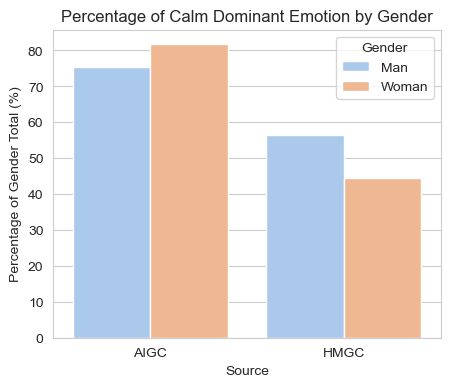

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV files into DataFrames
df_hmgc = pd.read_csv('HMGC_emotion.csv')
df_aigc = pd.read_csv('AIGC_emotion.csv')

# Remove any extra spaces from column names
df_hmgc.columns = df_hmgc.columns.str.strip()
df_aigc.columns = df_aigc.columns.str.strip()

# Ensure 'Dominant Emotion' column exists; create if necessary
if 'Dominant Emotion' not in df_hmgc.columns:
    df_hmgc['Dominant Emotion'] = df_hmgc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

if 'Dominant Emotion' not in df_aigc.columns:
    df_aigc['Dominant Emotion'] = df_aigc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

# Calculate the total count of each gender in each dataset
hmgc_gender_counts = df_hmgc['Gender'].value_counts()
aigc_gender_counts = df_aigc['Gender'].value_counts()

# Calculate the frequency of each dominant emotion by gender
hmgc_emotion_counts = df_hmgc.groupby(['Gender', 'Dominant Emotion']).size().unstack(fill_value=0)
aigc_emotion_counts = df_aigc.groupby(['Gender', 'Dominant Emotion']).size().unstack(fill_value=0)

# Calculate the percentage of each dominant emotion
hmgc_emotion_percentage = hmgc_emotion_counts.div(hmgc_gender_counts, axis=0) * 100
aigc_emotion_percentage = aigc_emotion_counts.div(aigc_gender_counts, axis=0) * 100

# Extract the percentage of 'CALM' emotion
calm_percentage_hmgc = hmgc_emotion_percentage['CALM']
calm_percentage_aigc = aigc_emotion_percentage['CALM']

# Prepare DataFrame for visualization
calm_df = pd.DataFrame({
    'Gender': calm_percentage_hmgc.index.tolist() + calm_percentage_aigc.index.tolist(),
    'Percentage': calm_percentage_hmgc.tolist() + calm_percentage_aigc.tolist(),
    'Source': ['HMGC'] * len(calm_percentage_hmgc) + ['AIGC'] * len(calm_percentage_aigc)
})

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Source', y='Percentage', hue='Gender', data=calm_df, order=["AIGC", "HMGC"])
plt.title('Percentage of Calm Dominant Emotion by Gender')
plt.ylabel('Percentage of Gender Total (%)')
plt.xlabel('Source')
plt.legend(title='Gender')
plt.show()


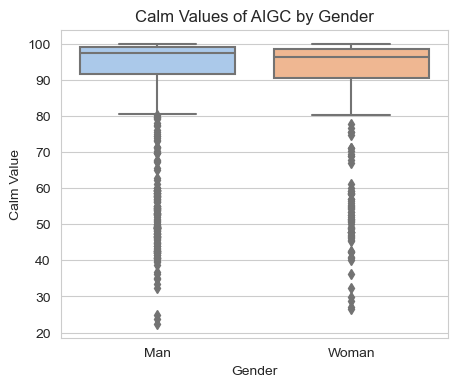

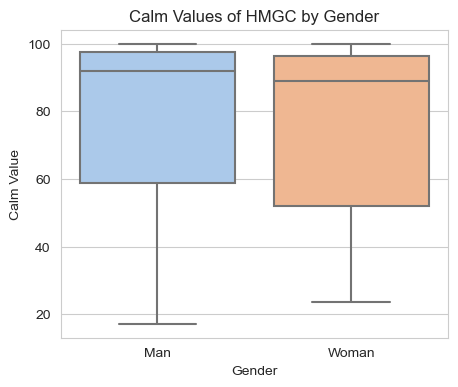

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV files into DataFrames
df_hmgc = pd.read_csv('HMGC_emotion.csv')
df_aigc = pd.read_csv('AIGC_emotion.csv')

# Remove extra spaces from column names
df_hmgc.columns = df_hmgc.columns.str.strip()
df_aigc.columns = df_aigc.columns.str.strip()

# Ensure 'Dominant Emotion' column exists; create if necessary
if 'Dominant Emotion' not in df_hmgc.columns:
    df_hmgc['Dominant Emotion'] = df_hmgc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

if 'Dominant Emotion' not in df_aigc.columns:
    df_aigc['Dominant Emotion'] = df_aigc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

# Filter rows where 'Dominant Emotion' is 'CALM'
df_hmgc_calm = df_hmgc[df_hmgc['Dominant Emotion'] == 'CALM']
df_aigc_calm = df_aigc[df_aigc['Dominant Emotion'] == 'CALM']

# Boxplot for AIGC data
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='CALM', data=df_aigc_calm, order=["Man", "Woman"])
plt.title('Calm Values in AIGC Data by Gender')
plt.xlabel('Gender')
plt.ylabel('Calm Value')
plt.show()

# Boxplot for HMGC data
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='CALM', data=df_hmgc_calm, order=["Man", "Woman"])
plt.title('Calm Values in HMGC Data by Gender')
plt.xlabel('Gender')
plt.ylabel('Calm Value')
plt.show()


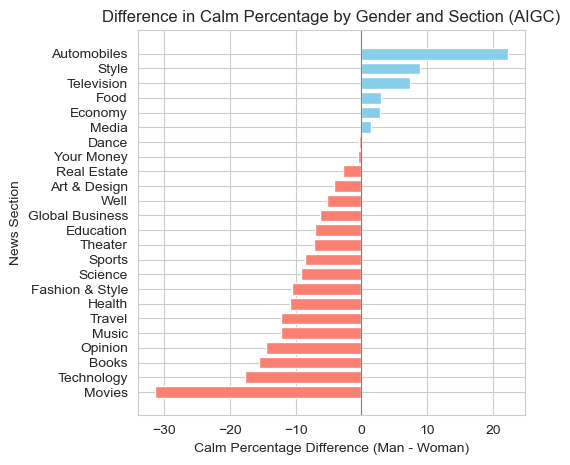

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of 'CALM' for each gender and section
calm_count_aigc = df_aigc[df_aigc['Dominant Emotion'] == 'CALM'].groupby(['section', 'Gender']).size().reset_index(name='Calm_Count')

# Calculate the total count for each gender and section
total_count_aigc = df_aigc.groupby(['section', 'Gender']).size().reset_index(name='Total_Count')

# Merge the counts and calculate the percentage
calm_percentage_aigc = pd.merge(calm_count_aigc, total_count_aigc, on=['section', 'Gender'])
calm_percentage_aigc['Calm_Percentage'] = (calm_percentage_aigc['Calm_Count'] / calm_percentage_aigc['Total_Count']) * 100

# Pivot table to calculate the difference
pivot_calm_aigc = calm_percentage_aigc.pivot(index='section', columns='Gender', values='Calm_Percentage')
pivot_calm_aigc['Difference'] = pivot_calm_aigc['Man'] - pivot_calm_aigc['Woman']

# Sort by difference for better visualization
sorted_calm_aigc = pivot_calm_aigc.sort_values('Difference')

# Prepare for plotting
sections = sorted_calm_aigc.index
differences = sorted_calm_aigc['Difference']

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(10, 8))

# Set colors: negative differences in red, positive differences in blue
colors = ['salmon' if x < 0 else 'skyblue' for x in differences]

plt.barh(sections, differences, color=colors)
plt.axvline(0, color='grey', linewidth=0.8)  # Add a vertical reference line at x=0

plt.title('Difference in Calm Percentage by Gender and Section (AIGC)')
plt.xlabel('Calm Percentage Difference (Man - Woman)')
plt.ylabel('News Section')

plt.show()


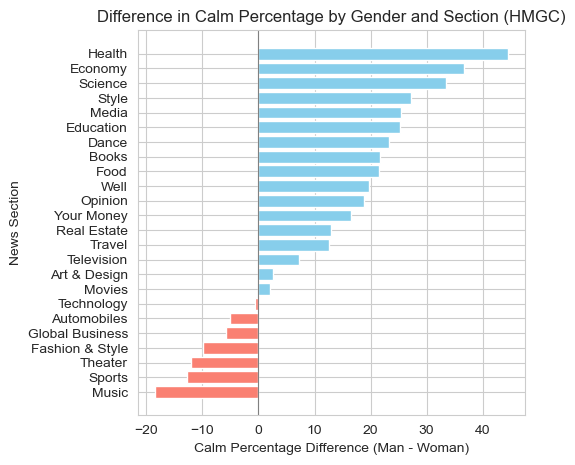

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of 'CALM' for each gender and section
calm_count_hmgc = df_hmgc[df_hmgc['Dominant Emotion'] == 'CALM'].groupby(['section', 'Gender']).size().reset_index(name='Calm_Count')

# Calculate the total count for each gender and section
total_count_hmgc = df_hmgc.groupby(['section', 'Gender']).size().reset_index(name='Total_Count')

# Merge the counts and calculate the percentage
calm_percentage_hmgc = pd.merge(calm_count_hmgc, total_count_hmgc, on=['section', 'Gender'])
calm_percentage_hmgc['Calm_Percentage'] = (calm_percentage_hmgc['Calm_Count'] / calm_percentage_hmgc['Total_Count']) * 100

# Pivot table to calculate the difference
pivot_calm_hmgc = calm_percentage_hmgc.pivot(index='section', columns='Gender', values='Calm_Percentage')
pivot_calm_hmgc['Difference'] = pivot_calm_hmgc['Man'] - pivot_calm_hmgc['Woman']

# Sort by difference for better visualization
sorted_calm_hmgc = pivot_calm_hmgc.sort_values('Difference')

# Prepare for plotting
sections = sorted_calm_hmgc.index
differences = sorted_calm_hmgc['Difference']

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(10, 8))

# Set colors: negative differences in red, positive differences in blue
colors = ['salmon' if x < 0 else 'skyblue' for x in differences]

plt.barh(sections, differences, color=colors)
plt.axvline(0, color='grey', linewidth=0.8)  # Add a vertical reference line at x=0

plt.title('Difference in Calm Percentage by Gender and Section (HMGC)')
plt.xlabel('Calm Percentage Difference (Man - Woman)')
plt.ylabel('News Section')

plt.show()


/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


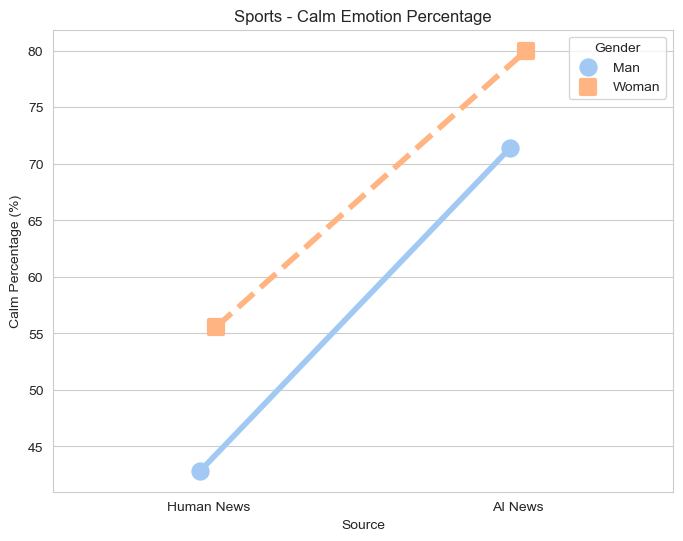

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


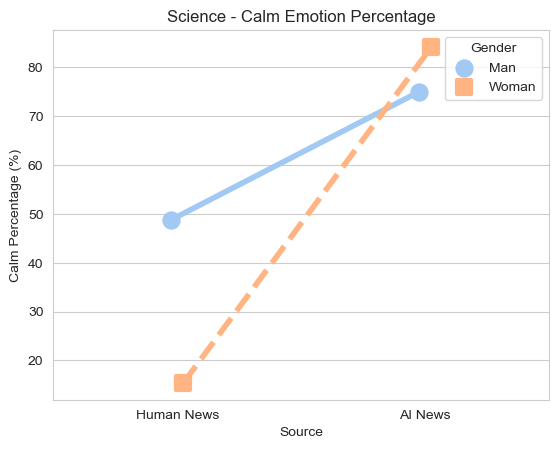

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


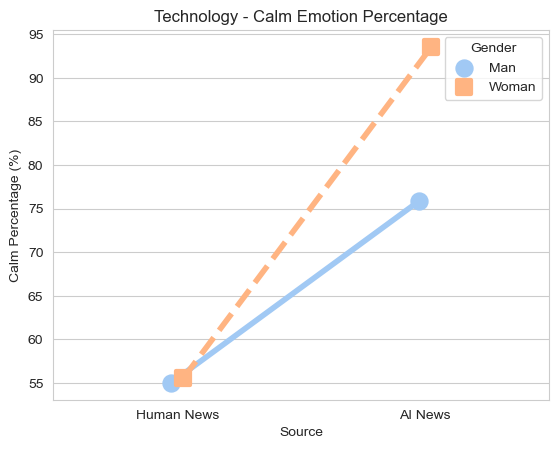

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


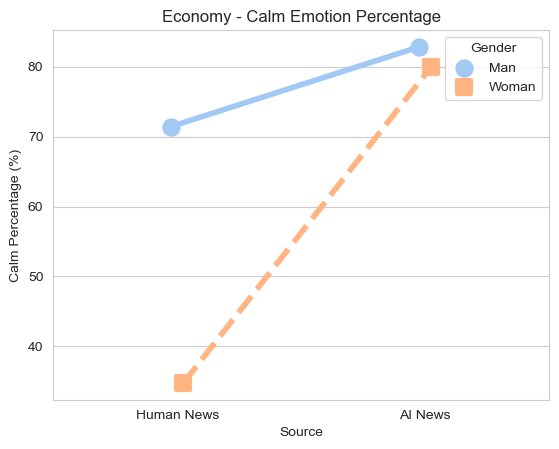

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3741382971.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


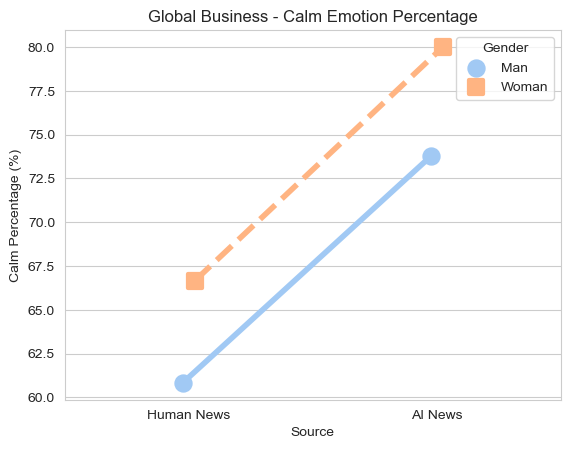

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for dominant emotion 'CALM'
calm_aigc = df_aigc[df_aigc['Dominant Emotion'] == 'CALM']
calm_hmgc = df_hmgc[df_hmgc['Dominant Emotion'] == 'CALM']

# Calculate the percentage of 'CALM' per gender and section
calm_percentage_aigc = (calm_aigc.groupby(['section', 'Gender']).size() / 
                        df_aigc.groupby(['section', 'Gender']).size() * 100).reset_index(name='Calm_Percentage')

calm_percentage_hmgc = (calm_hmgc.groupby(['section', 'Gender']).size() / 
                        df_hmgc.groupby(['section', 'Gender']).size() * 100).reset_index(name='Calm_Percentage')

# Add a source column to distinguish between the datasets
calm_percentage_aigc['Source'] = 'AI News'
calm_percentage_hmgc['Source'] = 'Human News'

# Combine the datasets
combined_calm_data = pd.concat([calm_percentage_aigc, calm_percentage_hmgc])

# Specify the sections to plot
sections_to_plot = ["Sports", "Science", "Technology", "Economy", "Global Business"]

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Plot data for each section
for section in sections_to_plot:
    subset = combined_calm_data[combined_calm_data['section'] == section]
    
    # Ensure the 'Source' column is categorical for ordered plotting
    subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)
    
    # Create point plots with lines
    sns.pointplot(data=subset, x='Source', y='Calm_Percentage', hue='Gender', 
                  palette="pastel", dodge=True, markers=["o", "s"], linestyles=["-", "--"], scale=1.5)
    
    # Set plot title and labels
    plt.title(f'{section} - Calm Emotion Percentage')
    plt.xlabel('Source')
    plt.ylabel('Calm Percentage (%)')
    
    # Show legend
    plt.legend(title='Gender')
    
    # Display the plot
    plt.show()


/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/1309004389.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/1309004389.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


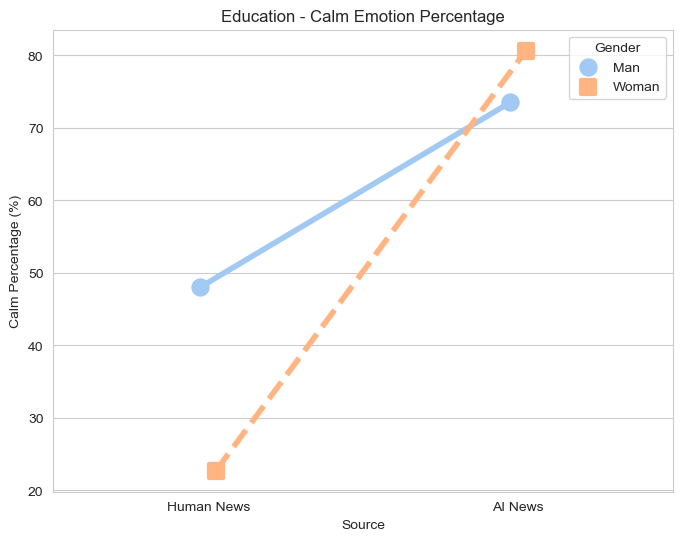

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/1309004389.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/1309004389.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


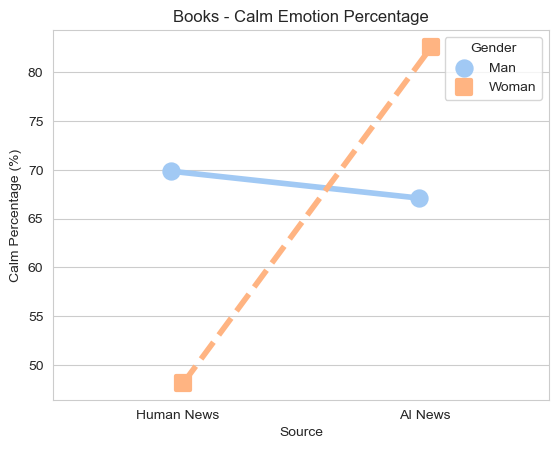

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/1309004389.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/1309004389.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


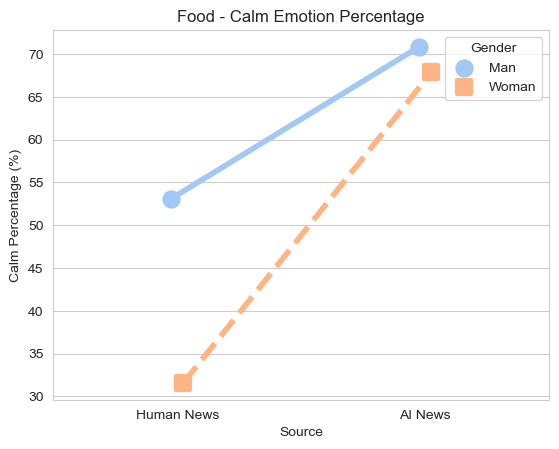

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df_aigc' and 'df_hmgc' are your DataFrames containing 'section', 'Gender', and 'Dominant Emotion' columns

# Filter data where the dominant emotion is 'CALM'
calm_aigc = df_aigc[df_aigc['Dominant Emotion'] == 'CALM']
calm_hmgc = df_hmgc[df_hmgc['Dominant Emotion'] == 'CALM']

# Calculate the percentage of 'CALM' emotion for each gender in each section
calm_percentage_aigc = (calm_aigc.groupby(['section', 'Gender']).size() / 
                        df_aigc.groupby(['section', 'Gender']).size() * 100).reset_index(name='Calm_Percentage')

calm_percentage_hmgc = (calm_hmgc.groupby(['section', 'Gender']).size() / 
                        df_hmgc.groupby(['section', 'Gender']).size() * 100).reset_index(name='Calm_Percentage')

# Add a source column
calm_percentage_aigc['Source'] = 'AI News'
calm_percentage_hmgc['Source'] = 'Human News'

# Combine the data
combined_calm_data = pd.concat([calm_percentage_aigc, calm_percentage_hmgc])

# Filter the sections to plot
sections_to_plot = ["Education", "Books", "Food"]

# Set the style of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Plot point and line plots for each section
for section in sections_to_plot:
    subset = combined_calm_data[combined_calm_data['section'] == section]
    
    # Ensure 'Source' column is an ordered categorical variable
    subset['Source'] = pd.Categorical(subset['Source'], categories=['Human News', 'AI News'], ordered=True)
    
    # Plot point and line plots
    sns.pointplot(data=subset, x='Source', y='Calm_Percentage', hue='Gender', 
                  palette="pastel", dodge=True, markers=["o", "s"], linestyles=["-", "--"], scale=1.5)
    
    # Add title and labels
    plt.title(f'{section} - Calm Emotion Percentage')
    plt.xlabel('Source')
    plt.ylabel('Calm Percentage (%)')
    
    # Show legend
    plt.legend(title='Gender')
    
    # Display the plot
    plt.show()


In [ ]:
#happy

In [33]:
import pandas as pd

Man_happy_ai = df_aigc[df_aigc['Gender'] == 'Man']['HAPPY']
Woman_happy_ai = df_aigc[df_aigc['Gender'] == 'Woman']['HAPPY']

print("Descriptive statistics of men happy：")
print(Man_happy_ai.describe())

print("Descriptive statistics of women happy：")
print(Woman_happy_ai.describe())

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(Man_happy_ai, Woman_happy_ai, equal_var=True)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

Descriptive statistics of men happy：
count    1635.000000
mean        6.777045
std        23.380587
min         0.000000
25%         0.004000
50%         0.015000
75%         0.083000
max       100.000000
Name: HAPPY, dtype: float64
Descriptive statistics of women happy：
count    639.000000
mean      10.120757
std       27.413261
min        0.000000
25%        0.013000
50%        0.056000
75%        0.522000
max      100.000000
Name: HAPPY, dtype: float64
t-statistic: -2.9158342271109023, p-value: 0.0035821372843588997


In [34]:
import pandas as pd

Man_happy_hm = df_hmgc[df_hmgc['Gender'] == 'Man']['HAPPY']
Woman_happy_hm = df_hmgc[df_hmgc['Gender'] == 'Woman']['HAPPY']

print("Descriptive statistics of men calm：")
print(Man_happy_hm.describe())

print("Descriptive statistics of women calm：")
print(Woman_happy_hm.describe())

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(Man_happy_hm, Woman_happy_hm, equal_var=True)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

Descriptive statistics of men calm：
count    1808.000000
mean       24.214664
std        39.533408
min         0.000000
25%         0.022000
50%         0.327500
75%        40.525750
max       100.000000
Name: HAPPY, dtype: float64
Descriptive statistics of women calm：
count    473.000000
mean      39.466879
std       45.469265
min        0.000000
25%        0.089000
50%        6.372000
75%       98.698000
max      100.000000
Name: HAPPY, dtype: float64
t-statistic: -7.232384697323769, p-value: 6.45042801913523e-13


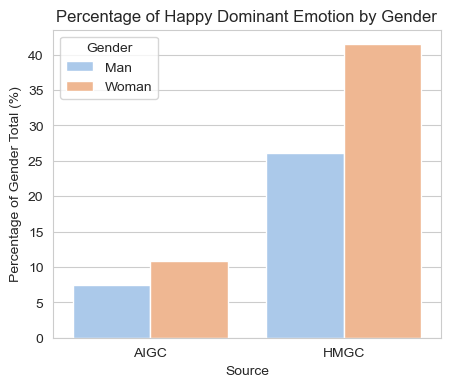

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read two CSV files
df_hmgc = pd.read_csv('HMGC_emotion.csv')
df_aigc = pd.read_csv('AIGC_emotion.csv')

# Remove any spaces in column names (if present)
df_hmgc.columns = df_hmgc.columns.str.strip()
df_aigc.columns = df_aigc.columns.str.strip()

# Ensure 'Dominant Emotion' column exists; if not, create it
if 'Dominant Emotion' not in df_hmgc.columns:
    df_hmgc['Dominant Emotion'] = df_hmgc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

if 'Dominant Emotion' not in df_aigc.columns:
    df_aigc['Dominant Emotion'] = df_aigc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

# Calculate the total number of genders in each file
hmgc_gender_counts = df_hmgc['Gender'].value_counts()
aigc_gender_counts = df_aigc['Gender'].value_counts()

# Calculate the frequency table of gender and Dominant Emotion in each file
hmgc_emotion_counts = df_hmgc.groupby(['Gender', 'Dominant Emotion']).size().unstack(fill_value=0)
aigc_emotion_counts = df_aigc.groupby(['Gender', 'Dominant Emotion']).size().unstack(fill_value=0)

# Calculate the proportion of each emotion in terms of gender totals
hmgc_emotion_percentage = hmgc_emotion_counts.div(hmgc_gender_counts, axis=0) * 100
aigc_emotion_percentage = aigc_emotion_counts.div(aigc_gender_counts, axis=0) * 100

# Extract the proportion of the dominant emotion being 'Happy'
calm_percentage_hmgc = hmgc_emotion_percentage['HAPPY']
calm_percentage_aigc = aigc_emotion_percentage['HAPPY']

# Create a DataFrame for visualization
calm_df = pd.DataFrame({
    'Gender': calm_percentage_hmgc.index.tolist() + calm_percentage_aigc.index.tolist(),
    'Percentage': calm_percentage_hmgc.tolist() + calm_percentage_aigc.tolist(),
    'Source': ['HMGC'] * len(calm_percentage_hmgc) + ['AIGC'] * len(calm_percentage_aigc)
})

# Visualization
plt.figure(figsize=(5, 4))
sns.barplot(x='Source', y='Percentage', hue='Gender', data=calm_df, order=["AIGC", "HMGC"])
plt.title('Percentage of Happy Dominant Emotion by Gender')
plt.ylabel('Percentage of Gender Total (%)')
plt.xlabel('Source')
plt.show()


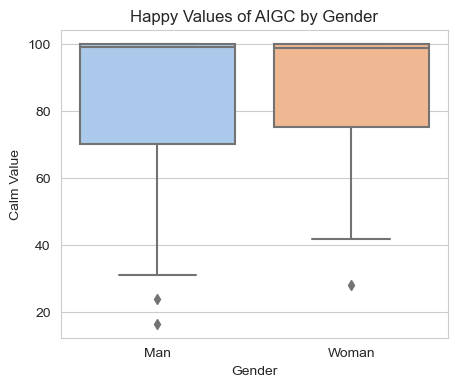

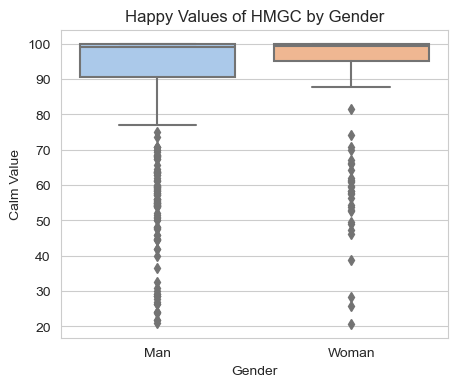

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read two CSV files
df_hmgc = pd.read_csv('HMGC_emotion.csv')
df_aigc = pd.read_csv('AIGC_emotion.csv')

# Remove any spaces in column names (if present)
df_hmgc.columns = df_hmgc.columns.str.strip()
df_aigc.columns = df_aigc.columns.str.strip()

# Ensure 'Dominant Emotion' column exists; if not, create it
if 'Dominant Emotion' not in df_hmgc.columns:
    df_hmgc['Dominant Emotion'] = df_hmgc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

if 'Dominant Emotion' not in df_aigc.columns:
    df_aigc['Dominant Emotion'] = df_aigc[['HAPPY', 'SAD', 'ANGRY', 'CONFUSED', 'DISGUSTED', 'SURPRISED', 'CALM', 'FEAR']].idxmax(axis=1)

# Filter rows where Dominant Emotion is 'Happy'
df_hmgc_calm = df_hmgc[df_hmgc['Dominant Emotion'] == 'HAPPY']
df_aigc_calm = df_aigc[df_aigc['Dominant Emotion'] == 'HAPPY']

# Box plot of Happy values in AIGC news data
plt.figure(figsize=(5, 4))
sns.boxplot(x='Gender', y='HAPPY', data=df_aigc_calm, order=["Man", "Woman"])
plt.title('Happy Values of AIGC by Gender')
plt.xlabel('Gender')
plt.ylabel('Happy Value')
plt.show()

# Box plot of Happy values in HMGC news data
plt.figure(figsize=(5, 4))
sns.boxplot(x='Gender', y='HAPPY', data=df_hmgc_calm, order=["Man", "Woman"])
plt.title('Happy Values of HMGC by Gender')
plt.xlabel('Gender')
plt.ylabel('Happy Value')
plt.show()


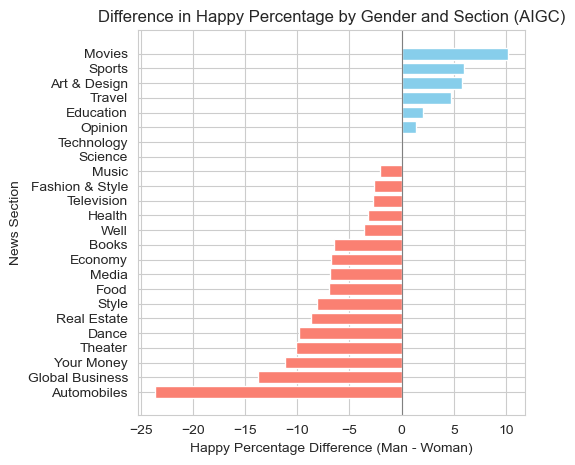

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df_aigc' is your DataFrame containing 'section', 'Gender', and 'Dominant Emotion' columns

# Step 1: Calculate the count of 'HAPPY' dominant emotion for each gender in each section
happy_count_aigc = df_aigc[df_aigc['Dominant Emotion'] == 'HAPPY'].groupby(['section', 'Gender']).size().reset_index(name='Happy_Count')

# Step 2: Calculate the total count for each gender in each section
total_count_aigc = df_aigc.groupby(['section', 'Gender']).size().reset_index(name='Total_Count')

# Step 3: Merge the two DataFrames and calculate the percentage
happy_percentage_aigc = pd.merge(happy_count_aigc, total_count_aigc, on=['section', 'Gender'], how='right')
happy_percentage_aigc['Happy_Percentage'] = (happy_percentage_aigc['Happy_Count'].fillna(0) / happy_percentage_aigc['Total_Count']) * 100

# Ensure that every section and Gender combination has a row
sections = df_aigc['section'].unique()
genders = df_aigc['Gender'].unique()
full_index = pd.MultiIndex.from_product([sections, genders], names=['section', 'Gender'])

# Reindex the DataFrame to ensure all combinations are present
happy_percentage_aigc = happy_percentage_aigc.set_index(['section', 'Gender']).reindex(full_index).fillna(0).reset_index()

# Step 4: Convert to a pivot table and calculate the difference
pivot_happy_aigc = happy_percentage_aigc.pivot(index='section', columns='Gender', values='Happy_Percentage')
pivot_happy_aigc['Difference'] = pivot_happy_aigc['Man'].fillna(0) - pivot_happy_aigc['Woman'].fillna(0)

# Sort data for better visual clarity
sorted_happy_aigc = pivot_happy_aigc.sort_values('Difference')

# Prepare the plot
sections = sorted_happy_aigc.index
differences = sorted_happy_aigc['Difference']

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(5, 5))

# Set colors: negative differences in red, positive differences in blue
colors = ['salmon' if x < 0 else 'skyblue' for x in differences]

plt.barh(sections, differences, color=colors)
plt.axvline(0, color='grey', linewidth=0.8)  # Add vertical reference line at x=0

plt.title('Difference in Happy Percentage by Gender and Section (AIGC)')
plt.xlabel('Happy Percentage Difference (Man - Woman)')
plt.ylabel('News Section')

plt.show()


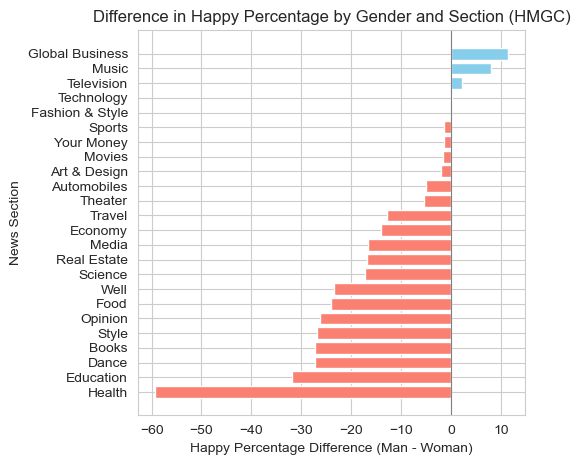

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df_hmgc' is your DataFrame containing 'section', 'Gender', and 'Dominant Emotion' columns

# Step 1: Calculate the count of 'HAPPY' dominant emotion for each gender in each section
happy_count_hmgc = df_hmgc[df_hmgc['Dominant Emotion'] == 'HAPPY'].groupby(['section', 'Gender']).size().reset_index(name='Happy_Count')

# Step 2: Calculate the total count for each gender in each section
total_count_hmgc = df_hmgc.groupby(['section', 'Gender']).size().reset_index(name='Total_Count')

# Step 3: Merge the two DataFrames and calculate the percentage
happy_percentage_hmgc = pd.merge(happy_count_hmgc, total_count_hmgc, on=['section', 'Gender'], how='right')
happy_percentage_hmgc['Happy_Percentage'] = (happy_percentage_hmgc['Happy_Count'] / happy_percentage_hmgc['Total_Count']) * 100

# Fill missing Happy_Count with 0 (indicating no dominant emotion of "HAPPY")
happy_percentage_hmgc['Happy_Percentage'] = happy_percentage_hmgc['Happy_Percentage'].fillna(0)

# Step 4: Convert to a pivot table and calculate the difference
pivot_happy_hmgc = happy_percentage_hmgc.pivot(index='section', columns='Gender', values='Happy_Percentage')
pivot_happy_hmgc = pivot_happy_hmgc.fillna(0)  # Fill missing values with 0
pivot_happy_hmgc['Difference'] = pivot_happy_hmgc['Man'] - pivot_happy_hmgc['Woman']

# Sort data for better visual clarity
sorted_happy_hmgc = pivot_happy_hmgc.sort_values('Difference')

# Prepare the plot
sections = sorted_happy_hmgc.index
differences = sorted_happy_hmgc['Difference']

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(5, 5))

# Set colors: negative differences in red, positive differences in blue
colors = ['salmon' if x < 0 else 'skyblue' for x in differences]

plt.barh(sections, differences, color=colors)
plt.axvline(0, color='grey', linewidth=0.8)  # Add vertical reference line at x=0

plt.title('Difference in Happy Percentage by Gender and Section (HMGC)')
plt.xlabel('Happy Percentage Difference (Man - Woman)')
plt.ylabel('News Section')

plt.show()


/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


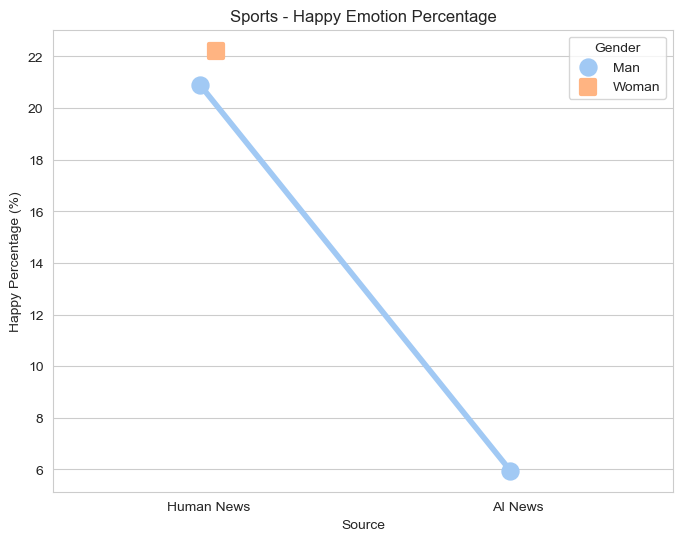

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


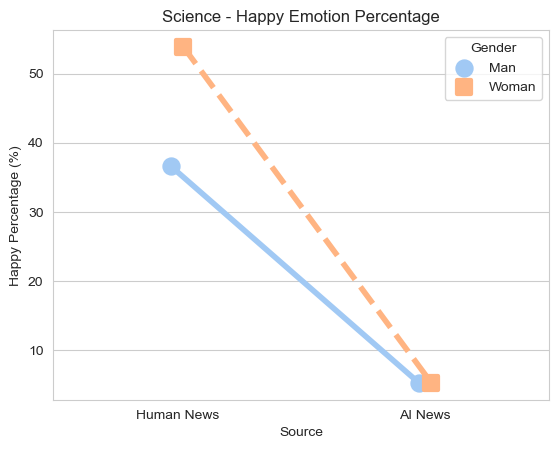

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


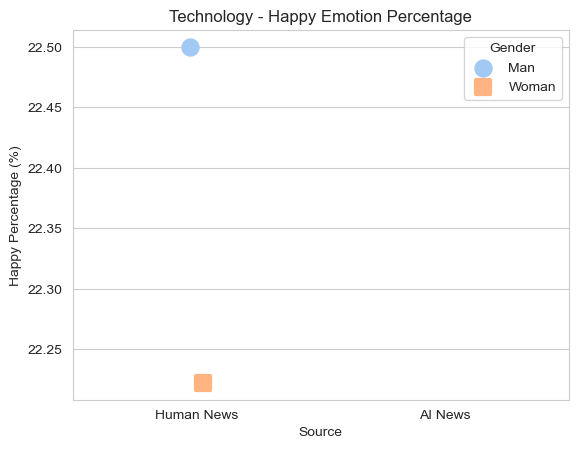

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


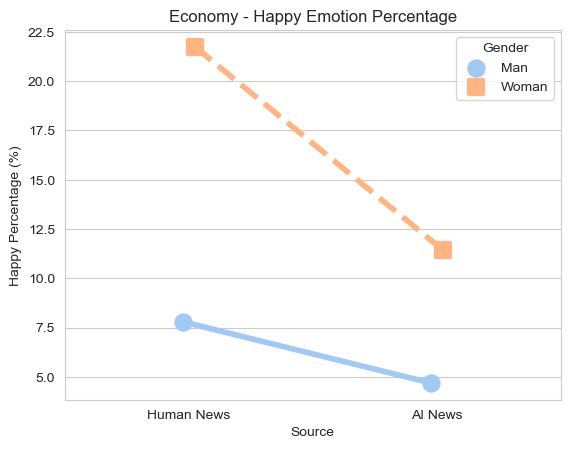

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3232181271.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


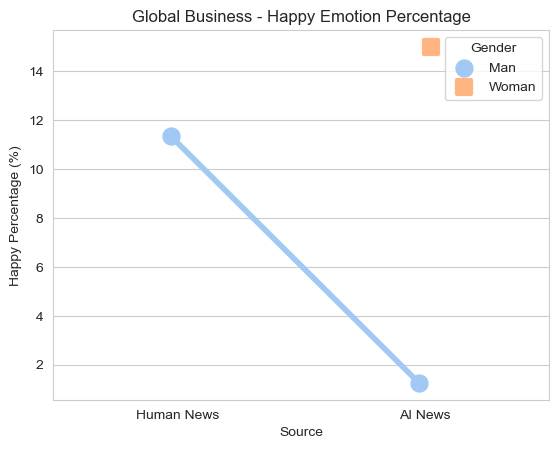

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df_ai' and 'df_hm' are your DataFrames containing 'section', 'Gender', and 'Dominant Emotion' columns

# Filter out the data where the dominant emotion is 'HAPPY'
happy_aigc = df_aigc[df_aigc['Dominant Emotion'] == 'HAPPY']
happy_hmgc = df_hmgc[df_hmgc['Dominant Emotion'] == 'HAPPY']

# Calculate the percentage of 'HAPPY' emotion for each gender in each section
happy_percentage_aigc = happy_aigc.groupby(['section', 'Gender']).size() / df_aigc.groupby(['section', 'Gender']).size() * 100
happy_percentage_hmgc = happy_hmgc.groupby(['section', 'Gender']).size() / df_hmgc.groupby(['section', 'Gender']).size() * 100

# Reset index and rename columns
happy_percentage_aigc = happy_percentage_aigc.reset_index(name='Happy_Percentage')
happy_percentage_hmgc = happy_percentage_hmgc.reset_index(name='Happy_Percentage')

# Add a source column
happy_percentage_aigc['Source'] = 'AI News'
happy_percentage_hmgc['Source'] = 'Human News'

# Combine the data
combined_happy_data = pd.concat([happy_percentage_aigc, happy_percentage_hmgc])

# Filter the sections to plot
sections_to_plot = ["Sports", "Science", "Technology", "Economy", "Global Business"]

# Set the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Plot point plots and line plots for each section
for section in sections_to_plot:
    subset = combined_happy_data[combined_happy_data['section'] == section]
    
    # Set the 'Source' column as an ordered categorical variable
    subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
    
    # Plot point plots and line plots
    sns.pointplot(data=subset, x='Source', y='Happy_Percentage', hue='Gender', palette="pastel", dodge=True, markers=["o", "s"], linestyles=["-", "--"], scale=1.5)
    
    # Add title and labels to each plot
    plt.title(f'{section} - Happy Emotion Percentage')
    plt.xlabel('Source')
    plt.ylabel('Happy Percentage (%)')

    # Display the legend
    plt.legend(title='Gender')

    # Show the plot for each section
    plt.show()


/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3019343172.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3019343172.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


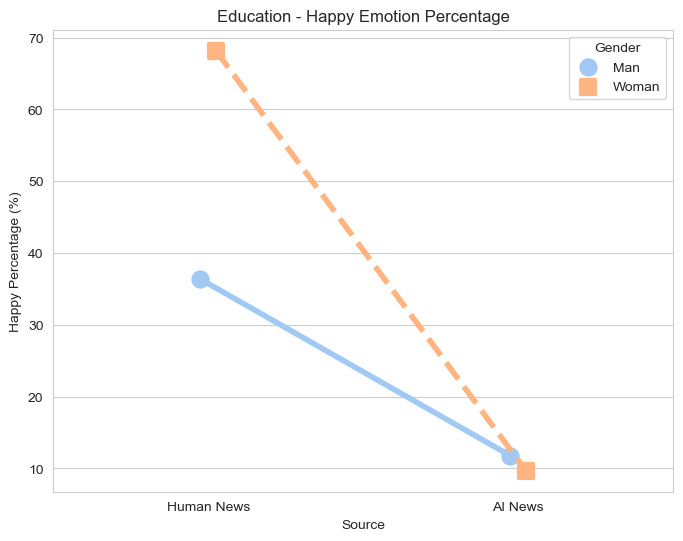

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3019343172.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3019343172.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


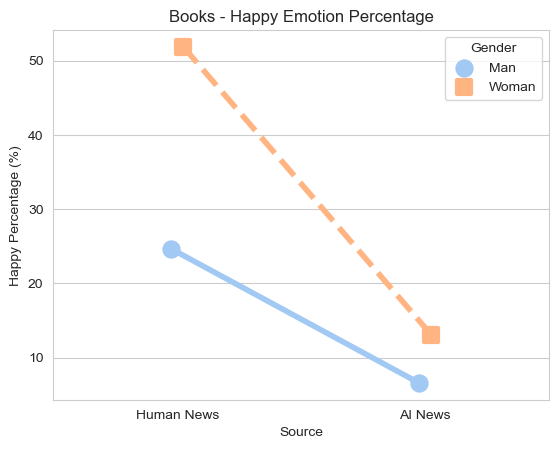

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3019343172.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_89949/3019343172.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


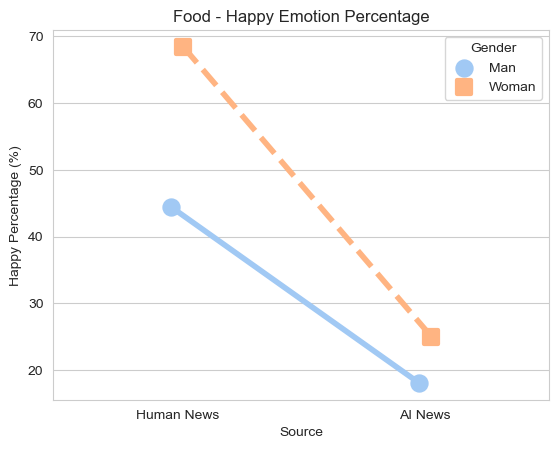

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'df_ai' and 'df_hm' are your DataFrames containing 'section', 'Gender', and 'Dominant Emotion' columns

# Filter out the data where the dominant emotion is 'HAPPY'
happy_aigc = df_aigc[df_aigc['Dominant Emotion'] == 'HAPPY']
happy_hmgc = df_hmgc[df_hmgc['Dominant Emotion'] == 'HAPPY']

# Calculate the percentage of 'HAPPY' emotion for each gender in each section
happy_percentage_aigc = happy_aigc.groupby(['section', 'Gender']).size() / df_aigc.groupby(['section', 'Gender']).size() * 100
happy_percentage_hmgc = happy_hmgc.groupby(['section', 'Gender']).size() / df_hmgc.groupby(['section', 'Gender']).size() * 100

# Reset index and rename columns
happy_percentage_aigc = happy_percentage_aigc.reset_index(name='Happy_Percentage')
happy_percentage_hmgc = happy_percentage_hmgc.reset_index(name='Happy_Percentage')

# Add a source column
happy_percentage_aigc['Source'] = 'AI News'
happy_percentage_hmgc['Source'] = 'Human News'

# Combine the data
combined_happy_data = pd.concat([happy_percentage_aigc, happy_percentage_hmgc])

# Filter the sections to plot
sections_to_plot = ["Education", "Books", "Food"]

# Set the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Plot point plots and line plots for each section
for section in sections_to_plot:
    subset = combined_happy_data[combined_happy_data['section'] == section]
    
    # Set 'Source' column as an ordered categorical variable
    subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
    
    # Plot point plots and line plots
    sns.pointplot(data=subset, x='Source', y='Happy_Percentage', hue='Gender', palette="pastel", dodge=True, markers=["o", "s"], linestyles=["-", "--"], scale=1.5)
    
    # Add title and labels to each plot
    plt.title(f'{section} - Happy Emotion Percentage')
    plt.xlabel('Source')
    plt.ylabel('Happy Percentage (%)')

    # Display the legend
    plt.legend(title='Gender')

    # Show the plot for each section
    plt.show()
